# **New York City Yellow Taxi Data**

## Objective
In this case study you will be learning exploratory data analysis (EDA) with the help of a dataset on yellow taxi rides in New York City. This will enable you to understand why EDA is an important step in the process of data science and machine learning.

## **Problem Statement**
As an analyst at an upcoming taxi operation in NYC, you are tasked to use the 2023 taxi trip data to uncover insights that could help optimise taxi operations. The goal is to analyse patterns in the data that can inform strategic decisions to improve service efficiency, maximise revenue, and enhance passenger experience.

## Tasks
You need to perform the following steps for successfully completing this assignment:
1. Data Loading
2. Data Cleaning
3. Exploratory Analysis: Bivariate and Multivariate
4. Creating Visualisations to Support the Analysis
5. Deriving Insights and Stating Conclusions

---

**NOTE:** The marks given along with headings and sub-headings are cumulative marks for those particular headings/sub-headings.<br>

The actual marks for each task are specified within the tasks themselves.

For example, marks given with heading *2* or sub-heading *2.1* are the cumulative marks, for your reference only. <br>

The marks you will receive for completing tasks are given with the tasks.

Suppose the marks for two tasks are: 3 marks for 2.1.1 and 2 marks for 3.2.2, or
* 2.1.1 [3 marks]
* 3.2.2 [2 marks]

then, you will earn 3 marks for completing task 2.1.1 and 2 marks for completing task 3.2.2.


---

## Data Understanding
The yellow taxi trip records include fields capturing pick-up and drop-off dates/times, pick-up and drop-off locations, trip distances, itemized fares, rate types, payment types, and driver-reported passenger counts.

The data is stored in Parquet format (*.parquet*). The dataset is from 2009 to 2024. However, for this assignment, we will only be using the data from 2023.

The data for each month is present in a different parquet file. You will get twelve files for each of the months in 2023.

The data was collected and provided to the NYC Taxi and Limousine Commission (TLC) by technology providers like vendors and taxi hailing apps. <br>

You can find the link to the TLC trip records page here: https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page

###  Data Description
You can find the data description here: [Data Dictionary](https://www.nyc.gov/assets/tlc/downloads/pdf/data_dictionary_trip_records_yellow.pdf)

**Trip Records**



|Field Name       |description |
|:----------------|:-----------|
| VendorID | A code indicating the TPEP provider that provided the record. <br> 1= Creative Mobile Technologies, LLC; <br> 2= VeriFone Inc. |
| tpep_pickup_datetime | The date and time when the meter was engaged.  |
| tpep_dropoff_datetime | The date and time when the meter was disengaged.   |
| Passenger_count | The number of passengers in the vehicle. <br> This is a driver-entered value. |
| Trip_distance | The elapsed trip distance in miles reported by the taximeter. |
| PULocationID | TLC Taxi Zone in which the taximeter was engaged |
| DOLocationID | TLC Taxi Zone in which the taximeter was disengaged |
|RateCodeID |The final rate code in effect at the end of the trip.<br> 1 = Standard rate <br> 2 = JFK <br> 3 = Newark <br>4 = Nassau or Westchester <br>5 = Negotiated fare <br>6 = Group ride |
|Store_and_fwd_flag |This flag indicates whether the trip record was held in vehicle memory before sending to the vendor, aka “store and forward,” because the vehicle did not have a connection to the server.  <br>Y= store and forward trip <br>N= not a store and forward trip |
|Payment_type| A numeric code signifying how the passenger paid for the trip. <br> 1 = Credit card <br>2 = Cash <br>3 = No charge <br>4 = Dispute <br>5 = Unknown <br>6 = Voided trip |
|Fare_amount| The time-and-distance fare calculated by the meter. <br>Extra Miscellaneous extras and surcharges.  Currently, this only includes the 0.50 and 1 USD rush hour and overnight charges. |
|MTA_tax |0.50 USD MTA tax that is automatically triggered based on the metered rate in use. |
|Improvement_surcharge | 0.30 USD improvement surcharge assessed trips at the flag drop. The improvement surcharge began being levied in 2015. |
|Tip_amount |Tip amount – This field is automatically populated for credit card tips. Cash tips are not included. |
| Tolls_amount | Total amount of all tolls paid in trip.  |
| total_amount | The total amount charged to passengers. Does not include cash tips. |
|Congestion_Surcharge |Total amount collected in trip for NYS congestion surcharge. |
| Airport_fee | 1.25 USD for pick up only at LaGuardia and John F. Kennedy Airports|

Although the amounts of extra charges and taxes applied are specified in the data dictionary, you will see that some cases have different values of these charges in the actual data.

**Taxi Zones**

Each of the trip records contains a field corresponding to the location of the pickup or drop-off of the trip, populated by numbers ranging from 1-263.

These numbers correspond to taxi zones, which may be downloaded as a table or map/shapefile and matched to the trip records using a join.

This is covered in more detail in later sections.

---

## **1** Data Preparation

<font color = red>[5 marks]</font> <br>

### Import Libraries

In [1]:
# Import warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Import the libraries you will be using for analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Recommended versions
# numpy version: 1.26.4
# pandas version: 2.2.2
# matplotlib version: 3.10.0
# seaborn version: 0.13.2

# Check versions
print("numpy version:", np.__version__)
print("pandas version:", pd.__version__)
print("matplotlib version:", plt.matplotlib.__version__)
print("seaborn version:", sns.__version__)

numpy version: 2.0.2
pandas version: 2.2.2
matplotlib version: 3.10.0
seaborn version: 0.13.2


### **1.1** Load the dataset
<font color = red>[5 marks]</font> <br>

You will see twelve files, one for each month.

To read parquet files with Pandas, you have to follow a similar syntax as that for CSV files.

`df = pd.read_parquet('file.parquet')`

In [ ]:
# Try loading one file

df = pd.read_parquet('2023-1.parquet')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3041714 entries, 0 to 3066765
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee            floa

How many rows are there? Do you think handling such a large number of rows is computationally feasible when we have to combine the data for all twelve months into one?

To handle this, we need to sample a fraction of data from each of the files. How to go about that? Think of a way to select only some portion of the data from each month's file that accurately represents the trends.

#### Sampling the Data
> One way is to take a small percentage of entries for pickup in every hour of a date. So, for all the days in a month, we can iterate through the hours and select 5% values randomly from those. Use `tpep_pickup_datetime` for this. Separate date and hour from the datetime values and then for each date, select some fraction of trips for each of the 24 hours.

To sample data, you can use the `sample()` method. Follow this syntax:

```Python
# sampled_data is an empty DF to keep appending sampled data of each hour
# hour_data is the DF of entries for an hour 'X' on a date 'Y'

sample = hour_data.sample(frac = 0.05, random_state = 42)
# sample 0.05 of the hour_data
# random_state is just a seed for sampling, you can define it yourself

sampled_data = pd.concat([sampled_data, sample]) # adding data for this hour to the DF
```

This *sampled_data* will contain 5% values selected at random from each hour.

Note that the code given above is only the part that will be used for sampling and not the complete code required for sampling and combining the data files.

Keep in mind that you sample by date AND hour, not just hour. (Why?)

---

**1.1.1** <font color = red>[5 marks]</font> <br>
Figure out how to sample and combine the files.

**Note:** It is not mandatory to use the method specified above. While sampling, you only need to make sure that your sampled data represents the overall data of all the months accurately.

In [ ]:
# Sample the data
# It is recommmended to not load all the files at once to avoid memory overload

In [4]:
 from google.colab import drive
 drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
# Take a small percentage of entries from each hour of every date.
# Iterating through the monthly data:
#   read a month file -> day -> hour: append sampled data -> move to next hour -> move to next day after 24 hours -> move to next month file
# Create a single dataframe for the year combining all the monthly data

# Select the folder having data files
import os

# Select the folder having data files
# os.chdir('/content/drive/MyDrive/Taxi Project/Data/trip_records') # Comment out or remove this line

# Create a list of all the twelve files to read from the content directory
file_list = [f for f in os.listdir('/content/drive/MyDrive/Taxi Project/Data/trip_records') if f.endswith('.parquet')]
file_list.sort() # Ensure files are processed in chronological order

# initialise an empty dataframe
df = pd.DataFrame()

# set sampling fraction
sample_fraction = 0.05

# iterate through the list of files and sample one by one:
for file_name in file_list:
    try:
        # file path for the current file
        file_path = os.path.join('/content/drive/MyDrive/Taxi Project/Data/trip_records', file_name) # Update the path here

        # Reading the current file
        monthly_df = pd.read_parquet(file_path)

        # Convert to datetime
        monthly_df['tpep_pickup_datetime'] = pd.to_datetime(monthly_df['tpep_pickup_datetime'])

        # Extract date and hour
        monthly_df['pickup_date'] = monthly_df['tpep_pickup_datetime'].dt.date
        monthly_df['pickup_hour'] = monthly_df['tpep_pickup_datetime'].dt.hour


        # We will store the sampled data for the current date in this df by appending the sampled data from each hour to this
        # After completing iteration through each date, we will append this data to the final dataframe.
        sampled_data = pd.DataFrame()

        # Loop through dates and then loop through every hour of each date
        for date in monthly_df['pickup_date'].unique():
            date_df = monthly_df[monthly_df['pickup_date'] == date]
            for hour in range(24):
                hour_data = date_df[date_df['pickup_hour'] == hour]
                if not hour_data.empty:
                    # Sample 5% of the hourly data randomly
                    sample = hour_data.sample(frac = sample_fraction, random_state = 42)
                    # add data of this hour to the dataframe
                    sampled_data = pd.concat([sampled_data, sample])

        # Concatenate the sampled data of all the dates to a single dataframe
        df = pd.concat([df, sampled_data])

    except Exception as e:
        print(f"Error reading file {file_name}: {e}")

# Drop temporary columns
df = df.drop(columns=['pickup_date', 'pickup_hour'])

# Display the first few rows of the combined dataframe
display(df.head())

# Display information about the combined dataframe
df.info()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,Airport_fee
428,2,2023-01-01 00:07:18,2023-01-01 00:23:15,1.0,7.74,1.0,N,138,256,2,32.40,6.0,0.5,0.00,0.0,1.0,41.15,0.0,1.25,NaN
1113,2,2023-01-01 00:16:41,2023-01-01 00:21:46,2.0,1.24,1.0,N,161,237,1,7.90,1.0,0.5,2.58,0.0,1.0,15.48,2.5,0.00,NaN
819,2,2023-01-01 00:14:03,2023-01-01 00:24:36,3.0,1.44,1.0,N,237,141,2,11.40,1.0,0.5,0.00,0.0,1.0,16.40,2.5,0.00,NaN
3192,2,2023-01-01 00:24:30,2023-01-01 00:29:55,1.0,0.54,1.0,N,143,142,2,6.50,1.0,0.5,0.00,0.0,1.0,11.50,2.5,0.00,NaN
2995263,2,2023-01-01 00:43:00,2023-01-01 01:01:00,NaN,19.24,NaN,None,66,107,0,25.64,0.0,0.5,5.93,0.0,1.0,35.57,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
Index: 1991327 entries, 428 to 2596448
Data columns (total 20 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee            fl

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


After combining the data files into one DataFrame, convert the new DataFrame to a CSV or parquet file and store it to use directly.

Ideally, you can try keeping the total entries to around 250,000 to 300,000.

In [6]:
# Store the df in csv/parquet
df.to_parquet('/content/drive/MyDrive/Taxi Project/Data/trip_records/combined_taxi_data_2023.parquet')

In [8]:
df.to_csv('/content/drive/MyDrive/Taxi Project/Data/trip_records/combined_taxi_data_2023.csv')

## **2** Data Cleaning
<font color = red>[30 marks]</font> <br>

Now we can load the new data directly.

In [9]:
# Load the new data file
df = pd.read_csv('/content/drive/MyDrive/Taxi Project/Data/trip_records/combined_taxi_data_2023.csv')

In [10]:
df.head()

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,...,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,Airport_fee
0,428,2,2023-01-01 00:07:18,2023-01-01 00:23:15,1.0,7.74,1.0,N,138,256,...,32.40,6.0,0.5,0.00,0.0,1.0,41.15,0.0,1.25,NaN
1,1113,2,2023-01-01 00:16:41,2023-01-01 00:21:46,2.0,1.24,1.0,N,161,237,...,7.90,1.0,0.5,2.58,0.0,1.0,15.48,2.5,0.00,NaN
2,819,2,2023-01-01 00:14:03,2023-01-01 00:24:36,3.0,1.44,1.0,N,237,141,...,11.40,1.0,0.5,0.00,0.0,1.0,16.40,2.5,0.00,NaN
3,3192,2,2023-01-01 00:24:30,2023-01-01 00:29:55,1.0,0.54,1.0,N,143,142,...,6.50,1.0,0.5,0.00,0.0,1.0,11.50,2.5,0.00,NaN
4,2995263,2,2023-01-01 00:43:00,2023-01-01 01:01:00,NaN,19.24,NaN,NaN,66,107,...,25.64,0.0,0.5,5.93,0.0,1.0,35.57,NaN,NaN,NaN


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1991327 entries, 0 to 1991326
Data columns (total 21 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Unnamed: 0             int64  
 1   VendorID               int64  
 2   tpep_pickup_datetime   object 
 3   tpep_dropoff_datetime  object 
 4   passenger_count        float64
 5   trip_distance          float64
 6   RatecodeID             float64
 7   store_and_fwd_flag     object 
 8   PULocationID           int64  
 9   DOLocationID           int64  
 10  payment_type           int64  
 11  fare_amount            float64
 12  extra                  float64
 13  mta_tax                float64
 14  tip_amount             float64
 15  tolls_amount           float64
 16  improvement_surcharge  float64
 17  total_amount           float64
 18  congestion_surcharge   float64
 19  airport_fee            float64
 20  Airport_fee            float64
dtypes: float64(13), int64(5), object(3)
memory usage: 319.

#### **2.1** Fixing Columns
<font color = red>[10 marks]</font> <br>

Fix/drop any columns as you seem necessary in the below sections

**2.1.1** <font color = red>[2 marks]</font> <br>

Fix the index and drop unnecessary columns

In [12]:
# Fix the index and drop any columns that are not needed

# Resetting the index
df = df.reset_index(drop=True)

# Display the first few rows to check the index and columns
display(df.head())

# Display information about the dataframe
df.info()

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,...,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,Airport_fee
0,428,2,2023-01-01 00:07:18,2023-01-01 00:23:15,1.0,7.74,1.0,N,138,256,...,32.40,6.0,0.5,0.00,0.0,1.0,41.15,0.0,1.25,NaN
1,1113,2,2023-01-01 00:16:41,2023-01-01 00:21:46,2.0,1.24,1.0,N,161,237,...,7.90,1.0,0.5,2.58,0.0,1.0,15.48,2.5,0.00,NaN
2,819,2,2023-01-01 00:14:03,2023-01-01 00:24:36,3.0,1.44,1.0,N,237,141,...,11.40,1.0,0.5,0.00,0.0,1.0,16.40,2.5,0.00,NaN
3,3192,2,2023-01-01 00:24:30,2023-01-01 00:29:55,1.0,0.54,1.0,N,143,142,...,6.50,1.0,0.5,0.00,0.0,1.0,11.50,2.5,0.00,NaN
4,2995263,2,2023-01-01 00:43:00,2023-01-01 01:01:00,NaN,19.24,NaN,NaN,66,107,...,25.64,0.0,0.5,5.93,0.0,1.0,35.57,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1991327 entries, 0 to 1991326
Data columns (total 21 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Unnamed: 0             int64  
 1   VendorID               int64  
 2   tpep_pickup_datetime   object 
 3   tpep_dropoff_datetime  object 
 4   passenger_count        float64
 5   trip_distance          float64
 6   RatecodeID             float64
 7   store_and_fwd_flag     object 
 8   PULocationID           int64  
 9   DOLocationID           int64  
 10  payment_type           int64  
 11  fare_amount            float64
 12  extra                  float64
 13  mta_tax                float64
 14  tip_amount             float64
 15  tolls_amount           float64
 16  improvement_surcharge  float64
 17  total_amount           float64
 18  congestion_surcharge   float64
 19  airport_fee            float64
 20  Airport_fee            float64
dtypes: float64(13), int64(5), object(3)
memory usage: 319.

**2.1.2** <font color = red>[3 marks]</font> <br>
There are two airport fee columns. This is possibly an error in naming columns. Let's see whether these can be combined into a single column.

In [13]:
# Combine the two airport fee columns


df['airport_fee'] = df['airport_fee'].fillna(df['Airport_fee'])
df = df.drop(columns=['Airport_fee'])


display(df[['airport_fee']].head())
df.info()

,airport_fee
0,1.25
1,0.00
2,0.00
3,0.00
4,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1991327 entries, 0 to 1991326
Data columns (total 20 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Unnamed: 0             int64  
 1   VendorID               int64  
 2   tpep_pickup_datetime   object 
 3   tpep_dropoff_datetime  object 
 4   passenger_count        float64
 5   trip_distance          float64
 6   RatecodeID             float64
 7   store_and_fwd_flag     object 
 8   PULocationID           int64  
 9   DOLocationID           int64  
 10  payment_type           int64  
 11  fare_amount            float64
 12  extra                  float64
 13  mta_tax                float64
 14  tip_amount             float64
 15  tolls_amount           float64
 16  improvement_surcharge  float64
 17  total_amount           float64
 18  congestion_surcharge   float64
 19  airport_fee            float64
dtypes: float64(12), int64(5), object(3)
memory usage: 303.9+ MB


**2.1.3** <font color = red>[5 marks]</font> <br>
Fix columns with negative (monetary) values

In [14]:
# check where values of fare amount are negative
print("Rows with negative 'fare_amount':")
display(df[df['fare_amount'] < 0])

# Check other monetary columns for negative values
monetary_columns = ['extra', 'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount', 'congestion_surcharge', 'airport_fee']
for col in monetary_columns:
    if (df[col] < 0).any():
        print(f"\nRows with negative '{col}':")
        display(df[df[col] < 0])

Rows with negative 'fare_amount':


,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee



Rows with negative 'extra':


,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
184944,636725,2,2023-10-06 22:24:42,2023-10-06 22:25:38,2.0,0.03,1.0,N,161,161,2,0.0,-1.0,-0.5,0.0,0.0,-1.0,-5.0,-2.5,0.0
300725,2880204,2,2023-10-27 14:51:03,2023-10-27 14:51:11,1.0,0.00,1.0,N,265,265,2,3.0,-2.5,0.0,0.0,0.0,1.0,4.0,0.0,0.0
361257,678398,2,2023-11-06 22:37:04,2023-11-06 22:37:55,1.0,0.03,1.0,N,229,229,2,0.0,-1.0,-0.5,0.0,0.0,-1.0,-5.0,-2.5,0.0



Rows with negative 'mta_tax':


,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
9093,179607,2,2023-01-03 14:24:45,2023-01-03 14:25:14,1.0,0.00,2.0,N,132,132,2,0.0,0.0,-0.5,0.0,0.0,-1.0,-5.25,-2.5,-1.25
77200,1516873,2,2023-01-17 12:37:35,2023-01-17 13:24:00,1.0,17.68,2.0,N,230,132,2,0.0,0.0,-0.5,0.0,0.0,-1.0,-4.00,-2.5,0.00
77920,1535432,2,2023-01-17 15:03:44,2023-01-17 15:36:28,1.0,4.12,1.0,N,239,168,2,0.0,0.0,-0.5,0.0,0.0,-1.0,-4.00,-2.5,0.00
86509,1706791,2,2023-01-19 09:50:26,2023-01-19 09:58:13,1.0,0.50,1.0,N,161,43,2,0.0,0.0,-0.5,0.0,0.0,-1.0,-4.00,-2.5,0.00
117837,2316861,2,2023-01-25 11:10:37,2023-01-25 11:11:02,1.0,0.02,2.0,N,170,233,2,0.0,0.0,-0.5,0.0,0.0,-1.0,-4.00,-2.5,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1915580,990002,2,2023-11-09 18:20:22,2023-11-09 18:26:46,2.0,0.79,1.0,N,143,143,2,0.0,0.0,-0.5,0.0,0.0,-1.0,-4.00,-2.5,0.00
1918233,2020250,2,2023-11-18 16:32:18,2023-11-18 16:32:48,1.0,0.02,1.0,N,164,164,4,0.0,0.0,-0.5,0.0,0.0,-1.0,-4.00,-2.5,0.00
1923757,970322,2,2023-12-09 08:34:26,2023-12-09 08:34:35,1.0,0.00,2.0,N,107,137,2,0.0,0.0,-0.5,0.0,0.0,-1.0,-4.00,-2.5,0.00
1952936,2211872,2,2023-08-25 21:14:13,2023-08-25 21:19:14,1.0,0.54,2.0,N,238,238,2,0.0,0.0,-0.5,0.0,0.0,-1.0,-4.00,-2.5,0.00



Rows with negative 'improvement_surcharge':


,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
3966,76507,2,2023-01-02 05:12:19,2023-01-02 05:41:45,1.0,17.07,3.0,N,142,1,2,0.0,0.0,0.0,0.0,0.0,-1.0,-1.00,0.0,0.00
9093,179607,2,2023-01-03 14:24:45,2023-01-03 14:25:14,1.0,0.00,2.0,N,132,132,2,0.0,0.0,-0.5,0.0,0.0,-1.0,-5.25,-2.5,-1.25
77200,1516873,2,2023-01-17 12:37:35,2023-01-17 13:24:00,1.0,17.68,2.0,N,230,132,2,0.0,0.0,-0.5,0.0,0.0,-1.0,-4.00,-2.5,0.00
77920,1535432,2,2023-01-17 15:03:44,2023-01-17 15:36:28,1.0,4.12,1.0,N,239,168,2,0.0,0.0,-0.5,0.0,0.0,-1.0,-4.00,-2.5,0.00
86509,1706791,2,2023-01-19 09:50:26,2023-01-19 09:58:13,1.0,0.50,1.0,N,161,43,2,0.0,0.0,-0.5,0.0,0.0,-1.0,-4.00,-2.5,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1915580,990002,2,2023-11-09 18:20:22,2023-11-09 18:26:46,2.0,0.79,1.0,N,143,143,2,0.0,0.0,-0.5,0.0,0.0,-1.0,-4.00,-2.5,0.00
1918233,2020250,2,2023-11-18 16:32:18,2023-11-18 16:32:48,1.0,0.02,1.0,N,164,164,4,0.0,0.0,-0.5,0.0,0.0,-1.0,-4.00,-2.5,0.00
1923757,970322,2,2023-12-09 08:34:26,2023-12-09 08:34:35,1.0,0.00,2.0,N,107,137,2,0.0,0.0,-0.5,0.0,0.0,-1.0,-4.00,-2.5,0.00
1952936,2211872,2,2023-08-25 21:14:13,2023-08-25 21:19:14,1.0,0.54,2.0,N,238,238,2,0.0,0.0,-0.5,0.0,0.0,-1.0,-4.00,-2.5,0.00



Rows with negative 'total_amount':


,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
3966,76507,2,2023-01-02 05:12:19,2023-01-02 05:41:45,1.0,17.07,3.0,N,142,1,2,0.0,0.0,0.0,0.0,0.0,-1.0,-1.00,0.0,0.00
9093,179607,2,2023-01-03 14:24:45,2023-01-03 14:25:14,1.0,0.00,2.0,N,132,132,2,0.0,0.0,-0.5,0.0,0.0,-1.0,-5.25,-2.5,-1.25
77200,1516873,2,2023-01-17 12:37:35,2023-01-17 13:24:00,1.0,17.68,2.0,N,230,132,2,0.0,0.0,-0.5,0.0,0.0,-1.0,-4.00,-2.5,0.00
77920,1535432,2,2023-01-17 15:03:44,2023-01-17 15:36:28,1.0,4.12,1.0,N,239,168,2,0.0,0.0,-0.5,0.0,0.0,-1.0,-4.00,-2.5,0.00
86509,1706791,2,2023-01-19 09:50:26,2023-01-19 09:58:13,1.0,0.50,1.0,N,161,43,2,0.0,0.0,-0.5,0.0,0.0,-1.0,-4.00,-2.5,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1915580,990002,2,2023-11-09 18:20:22,2023-11-09 18:26:46,2.0,0.79,1.0,N,143,143,2,0.0,0.0,-0.5,0.0,0.0,-1.0,-4.00,-2.5,0.00
1918233,2020250,2,2023-11-18 16:32:18,2023-11-18 16:32:48,1.0,0.02,1.0,N,164,164,4,0.0,0.0,-0.5,0.0,0.0,-1.0,-4.00,-2.5,0.00
1923757,970322,2,2023-12-09 08:34:26,2023-12-09 08:34:35,1.0,0.00,2.0,N,107,137,2,0.0,0.0,-0.5,0.0,0.0,-1.0,-4.00,-2.5,0.00
1952936,2211872,2,2023-08-25 21:14:13,2023-08-25 21:19:14,1.0,0.54,2.0,N,238,238,2,0.0,0.0,-0.5,0.0,0.0,-1.0,-4.00,-2.5,0.00



Rows with negative 'congestion_surcharge':


,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
9093,179607,2,2023-01-03 14:24:45,2023-01-03 14:25:14,1.0,0.00,2.0,N,132,132,2,0.0,0.0,-0.5,0.0,0.0,-1.0,-5.25,-2.5,-1.25
77200,1516873,2,2023-01-17 12:37:35,2023-01-17 13:24:00,1.0,17.68,2.0,N,230,132,2,0.0,0.0,-0.5,0.0,0.0,-1.0,-4.00,-2.5,0.00
77920,1535432,2,2023-01-17 15:03:44,2023-01-17 15:36:28,1.0,4.12,1.0,N,239,168,2,0.0,0.0,-0.5,0.0,0.0,-1.0,-4.00,-2.5,0.00
86509,1706791,2,2023-01-19 09:50:26,2023-01-19 09:58:13,1.0,0.50,1.0,N,161,43,2,0.0,0.0,-0.5,0.0,0.0,-1.0,-4.00,-2.5,0.00
117837,2316861,2,2023-01-25 11:10:37,2023-01-25 11:11:02,1.0,0.02,2.0,N,170,233,2,0.0,0.0,-0.5,0.0,0.0,-1.0,-4.00,-2.5,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1915580,990002,2,2023-11-09 18:20:22,2023-11-09 18:26:46,2.0,0.79,1.0,N,143,143,2,0.0,0.0,-0.5,0.0,0.0,-1.0,-4.00,-2.5,0.00
1918233,2020250,2,2023-11-18 16:32:18,2023-11-18 16:32:48,1.0,0.02,1.0,N,164,164,4,0.0,0.0,-0.5,0.0,0.0,-1.0,-4.00,-2.5,0.00
1923757,970322,2,2023-12-09 08:34:26,2023-12-09 08:34:35,1.0,0.00,2.0,N,107,137,2,0.0,0.0,-0.5,0.0,0.0,-1.0,-4.00,-2.5,0.00
1952936,2211872,2,2023-08-25 21:14:13,2023-08-25 21:19:14,1.0,0.54,2.0,N,238,238,2,0.0,0.0,-0.5,0.0,0.0,-1.0,-4.00,-2.5,0.00



Rows with negative 'airport_fee':


,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
9093,179607,2,2023-01-03 14:24:45,2023-01-03 14:25:14,1.0,0.00,2.0,N,132,132,2,0.0,0.0,-0.5,0.0,0.0,-1.0,-5.25,-2.5,-1.25
239893,1694220,2,2023-10-17 00:56:18,2023-10-17 00:56:35,1.0,0.06,1.0,N,132,132,2,0.0,0.0,-0.5,0.0,0.0,-1.0,-3.25,0.0,-1.75
240472,1703670,2,2023-10-17 08:39:40,2023-10-17 08:41:19,1.0,0.29,1.0,N,138,70,2,0.0,0.0,-0.5,0.0,0.0,-1.0,-3.25,0.0,-1.75
354781,550038,2,2023-11-05 17:01:32,2023-11-05 19:03:35,1.0,122.46,4.0,N,132,265,2,0.0,0.0,0.0,0.0,0.0,-1.0,-2.75,0.0,-1.75
390002,1234261,2,2023-11-11 18:50:47,2023-11-11 19:40:33,4.0,20.06,2.0,N,132,151,2,0.0,0.0,-0.5,0.0,0.0,-1.0,-3.25,0.0,-1.75
456757,2420372,2,2023-11-22 15:44:42,2023-11-22 15:45:57,1.0,0.05,2.0,N,132,132,4,0.0,0.0,-0.5,0.0,0.0,-1.0,-3.25,0.0,-1.75
592821,1937748,2,2023-12-17 08:10:57,2023-12-17 08:28:46,1.0,11.27,1.0,N,132,70,2,0.0,0.0,-0.5,0.0,0.0,-1.0,-3.25,0.0,-1.75
725836,1328318,2,2023-03-13 11:40:22,2023-03-13 11:51:53,1.0,3.49,1.0,N,138,253,2,0.0,0.0,-0.5,0.0,0.0,-1.0,-2.75,0.0,-1.25
736319,2098034,2,2023-03-20 12:10:40,2023-03-20 13:03:14,1.0,16.11,2.0,N,132,170,2,0.0,0.0,-0.5,0.0,0.0,-1.0,-5.25,-2.5,-1.25
940700,2227565,2,2023-06-21 16:01:44,2023-06-21 17:11:47,1.0,12.56,2.0,N,132,114,2,0.0,0.0,-0.5,0.0,0.0,-1.0,-5.75,-2.5,-1.75


Did you notice something different in the `RatecodeID` column for above records?

In [15]:
# Analyse RatecodeID for the negative fare amounts

rows_with_neg_monetary = df[(df[monetary_columns] < 0).any(axis=1)]

display(rows_with_neg_monetary['RatecodeID'].value_counts())

,count
RatecodeID,
1.0,54
2.0,29
5.0,3
3.0,1
4.0,1


In [16]:
# Find which columns have negative values

display(rows_with_neg_monetary['RatecodeID'].value_counts())

,count
RatecodeID,
1.0,54
2.0,29
5.0,3
3.0,1
4.0,1


In [17]:
# fix these negative values
monetary_columns = ['fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount', 'congestion_surcharge', 'airport_fee']

for col in monetary_columns:
    df[col] = df[col].apply(lambda x: max(x, 0))

# Verify that negative values are gone
for col in monetary_columns:
    if (df[col] < 0).any():
        print(f"Negative values found in '{col}' after fixing.")
    else:
        print(f"No negative values found in '{col}' after fixing.")

No negative values found in 'fare_amount' after fixing.
No negative values found in 'extra' after fixing.
No negative values found in 'mta_tax' after fixing.
No negative values found in 'tip_amount' after fixing.
No negative values found in 'tolls_amount' after fixing.
No negative values found in 'improvement_surcharge' after fixing.
No negative values found in 'total_amount' after fixing.
No negative values found in 'congestion_surcharge' after fixing.
No negative values found in 'airport_fee' after fixing.


### **2.2** Handling Missing Values
<font color = red>[10 marks]</font> <br>

**2.2.1**  <font color = red>[2 marks]</font> <br>
Find the proportion of missing values in each column




In [18]:
# Find the proportion of missing values in each column
missing_values = df.isnull().sum()
missing_proportion = (missing_values / len(df)) * 100

display(missing_proportion[missing_proportion > 0].sort_values(ascending=False))

,0
passenger_count,3.421437
RatecodeID,3.421437
store_and_fwd_flag,3.421437
congestion_surcharge,3.421437
airport_fee,3.421437


**2.2.2**  <font color = red>[3 marks]</font> <br>
Handling missing values in `passenger_count`

In [19]:
# Display the rows with null values
print("Rows with missing 'passenger_count':")
display(df[df['passenger_count'].isnull()])

# Impute NaN values in 'passenger_count'
# It's common to impute with the mode or a reasonable default (e.g., 1)
# Let's check the distribution of passenger_count first to decide

print("\nDistribution of 'passenger_count':")
display(df['passenger_count'].value_counts(dropna=False))

# Imputing with the mode (most frequent passenger count)
mode_passenger_count = df['passenger_count'].mode()[0]
df['passenger_count'].fillna(mode_passenger_count, inplace=True)

# Convert to integer type if appropriate
df['passenger_count'] = df['passenger_count'].astype(int)


# Check for zero values in passenger_count
print("\nNumber of rows with 'passenger_count' equal to 0:")
print(df[df['passenger_count'] == 0].shape[0])

# Remove rows where passenger_count is 0
df = df[df['passenger_count'] > 0].copy()

# Verify that zero passenger counts are gone
print("\nNumber of rows with 'passenger_count' equal to 0 after removal:")
print(df[df['passenger_count'] == 0].shape[0])

Rows with missing 'passenger_count':


,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
4,2995263,2,2023-01-01 00:43:00,2023-01-01 01:01:00,NaN,19.24,NaN,NaN,66,107,0,25.64,0.0,0.5,5.93,0.00,1.0,35.57,NaN,NaN
15,2995167,2,2023-01-01 00:41:50,2023-01-01 01:14:50,NaN,10.77,NaN,NaN,151,106,0,45.38,0.0,0.5,11.19,6.55,1.0,67.12,NaN,NaN
42,2995165,2,2023-01-01 00:37:21,2023-01-01 00:54:18,NaN,4.52,NaN,NaN,114,262,0,25.38,0.0,0.5,0.00,0.00,1.0,29.38,NaN,NaN
43,2995317,2,2023-01-01 00:44:03,2023-01-01 01:13:49,NaN,9.19,NaN,NaN,239,256,0,40.00,0.0,0.5,2.20,0.00,1.0,46.20,NaN,NaN
46,2995090,2,2023-01-01 00:50:55,2023-01-01 01:19:06,NaN,2.74,NaN,NaN,90,48,0,18.48,0.0,0.5,3.37,0.00,1.0,25.85,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1991268,2840859,2,2023-09-29 19:55:27,2023-09-29 20:04:28,NaN,1.59,NaN,NaN,236,237,0,14.48,0.0,0.5,3.70,0.00,1.0,22.18,NaN,NaN
1991269,2840922,2,2023-09-29 19:39:00,2023-09-29 19:49:00,NaN,1.50,NaN,NaN,114,4,0,10.62,0.0,0.5,0.00,0.00,1.0,14.62,NaN,NaN
1991276,2840645,2,2023-09-29 19:32:02,2023-09-29 19:55:48,NaN,10.73,NaN,NaN,97,138,0,36.28,0.0,0.5,7.56,0.00,1.0,45.34,NaN,NaN
1991319,2841813,2,2023-09-29 23:01:21,2023-09-29 23:15:00,NaN,1.90,NaN,NaN,4,249,0,17.55,0.0,0.5,3.23,0.00,1.0,24.78,NaN,NaN



Distribution of 'passenger_count':


,count
passenger_count,
1.0,1446471
2.0,291012
3.0,72376
NaN,68132
4.0,40387
0.0,31234
5.0,25004
6.0,16690
8.0,11



Number of rows with 'passenger_count' equal to 0:
31234

Number of rows with 'passenger_count' equal to 0 after removal:
0


Did you find zeroes in passenger_count? Handle these.

**2.2.3**  <font color = red>[2 marks]</font> <br>
Handle missing values in `RatecodeID`

In [20]:
# Fix missing values in 'RatecodeID'

# Check the distribution of RatecodeID including NaN
print("Distribution of 'RatecodeID' before imputation:")
display(df['RatecodeID'].value_counts(dropna=False))

# Impute NaN values with the mode
mode_ratecodeID = df['RatecodeID'].mode()[0]
df['RatecodeID'].fillna(mode_ratecodeID, inplace=True)

# Convert to integer type if appropriate and if mode is integer
if mode_ratecodeID.is_integer():
    df['RatecodeID'] = df['RatecodeID'].astype(int)

# Check the distribution after imputation
print("\nDistribution of 'RatecodeID' after imputation:")
display(df['RatecodeID'].value_counts(dropna=False))

# Verify that there are no more missing values in RatecodeID
print("\nMissing values in 'RatecodeID' after imputation:", df['RatecodeID'].isnull().sum())

Distribution of 'RatecodeID' before imputation:


,count
RatecodeID,
1.0,1785888
2.0,74342
NaN,68132
99.0,10964
5.0,10565
3.0,6336
4.0,3863
6.0,3



Distribution of 'RatecodeID' after imputation:


,count
RatecodeID,
1,1854020
2,74342
99,10964
5,10565
3,6336
4,3863
6,3



Missing values in 'RatecodeID' after imputation: 0


**2.2.4**  <font color = red>[3 marks]</font> <br>
Impute NaN in `congestion_surcharge`

In [21]:
# handle null values in congestion_surcharge

# Check the distribution of congestion_surcharge including NaN
print("Distribution of 'congestion_surcharge' before imputation:")
display(df['congestion_surcharge'].value_counts(dropna=False))

# Impute NaN values with 0
df['congestion_surcharge'].fillna(0, inplace=True)

# Check the distribution after imputation
print("\nDistribution of 'congestion_surcharge' after imputation:")
display(df['congestion_surcharge'].value_counts(dropna=False))

# Verify that there are no more missing values in congestion_surcharge
print("\nMissing values in 'congestion_surcharge' after imputation:", df['congestion_surcharge'].isnull().sum())

Distribution of 'congestion_surcharge' before imputation:


,count
congestion_surcharge,
2.5,1746350
0.0,145610
NaN,68132
0.5,1



Distribution of 'congestion_surcharge' after imputation:


,count
congestion_surcharge,
2.5,1746350
0.0,213742
0.5,1



Missing values in 'congestion_surcharge' after imputation: 0


Are there missing values in other columns? Did you find NaN values in some other set of columns? Handle those missing values below.

In [22]:
# Handle any remaining missing values

# Impute missing values in 'store_and_fwd_flag' with 'N'
df['store_and_fwd_flag'].fillna('N', inplace=True)

# Impute missing values in 'airport_fee' with 0
df['airport_fee'].fillna(0, inplace=True)

# Verify that there are no more missing values in these columns
print("Missing values after handling:")
display(df[['store_and_fwd_flag', 'airport_fee']].isnull().sum())

# Check the total proportion of missing values again
missing_values_total = df.isnull().sum()
missing_proportion_total = (missing_values_total / len(df)) * 100

print("\nProportion of missing values in all columns after handling:")
display(missing_proportion_total[missing_proportion_total > 0].sort_values(ascending=False))

Missing values after handling:


,0
store_and_fwd_flag,0
airport_fee,0



Proportion of missing values in all columns after handling:


,0


### **2.3** Handling Outliers
<font color = red>[10 marks]</font> <br>

Before we start fixing outliers, let's perform outlier analysis.

In [23]:
# Describe the data and check if there are any potential outliers present
# Check for potential out of place values in various columns

print("Description of numerical columns:")
display(df.describe())

# Check for specific outlier conditions mentioned in the markdown
print("\nChecking for specific outlier conditions:")

# Entries where trip_distance is nearly 0 and fare_amount is more than 300
print("\nRows with trip_distance near 0 and fare_amount > 300:")
display(df[(df['trip_distance'] < 0.1) & (df['fare_amount'] > 300)])

# Entries where trip_distance and fare_amount are 0 but pickup and dropoff zones are different
print("\nRows with trip_distance=0, fare_amount=0, and different pickup/dropoff zones:")
display(df[(df['trip_distance'] == 0) & (df['fare_amount'] == 0) & (df['PULocationID'] != df['DOLocationID'])])

# Entries where trip_distance is more than 250 miles
print("\nRows with trip_distance > 250 miles:")
display(df[df['trip_distance'] > 250])

# Entries where payment_type is 0
print("\nRows with payment_type = 0:")
display(df[df['payment_type'] == 0])

# Check for outliers in passenger_count (although we removed 0s, still check for unusually high counts)
print("\nDistribution of passenger_count:")
display(df['passenger_count'].value_counts().sort_index())

Description of numerical columns:


,Unnamed: 0,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
count,1.960093e+06,1.960093e+06,1.960093e+06,1.960093e+06,1.960093e+06,1.960093e+06,1.960093e+06,1.960093e+06,1.960093e+06,1.960093e+06,1.960093e+06,1.960093e+06,1.960093e+06,1.960093e+06,1.960093e+06,1.960093e+06,1.960093e+06
mean,1.607293e+06,1.744657e+00,1.377808e+00,3.880079e+00,1.620047e+00,1.652437e+02,1.640134e+02,1.162296e+00,1.995410e+01,1.561176e+00,4.952919e-01,3.554583e+00,5.998087e-01,9.990256e-01,2.903001e+01,2.227382e+00,1.386735e-01
std,9.387635e+05,4.414612e-01,8.697001e-01,1.298111e+02,7.313788e+00,6.399825e+01,6.981863e+01,5.077347e-01,1.038627e+02,1.820809e+00,4.854079e-02,4.057348e+00,2.192653e+00,2.883178e-02,1.047591e+02,7.792462e-01,4.585901e-01
min,2.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,7.991100e+05,1.000000e+00,1.000000e+00,1.050000e+00,1.000000e+00,1.320000e+02,1.140000e+02,1.000000e+00,9.300000e+00,0.000000e+00,5.000000e-01,1.000000e+00,0.000000e+00,1.000000e+00,1.596000e+01,2.500000e+00,0.000000e+00
50%,1.597122e+06,2.000000e+00,1.000000e+00,1.800000e+00,1.000000e+00,1.620000e+02,1.620000e+02,1.000000e+00,1.350000e+01,1.000000e+00,5.000000e-01,2.850000e+00,0.000000e+00,1.000000e+00,2.109000e+01,2.500000e+00,0.000000e+00
75%,2.395493e+06,2.000000e+00,1.000000e+00,3.410000e+00,1.000000e+00,2.340000e+02,2.340000e+02,1.000000e+00,2.225000e+01,2.500000e+00,5.000000e-01,4.450000e+00,0.000000e+00,1.000000e+00,3.100000e+01,2.500000e+00,0.000000e+00
max,3.522233e+06,6.000000e+00,9.000000e+00,1.263605e+05,9.900000e+01,2.650000e+02,2.650000e+02,4.000000e+00,1.431635e+05,2.080000e+01,4.000000e+00,2.230800e+02,1.430000e+02,1.000000e+00,1.431675e+05,2.500000e+00,1.750000e+00



Checking for specific outlier conditions:

Rows with trip_distance near 0 and fare_amount > 300:


,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
38085,750805,1,2023-01-09 16:17:32,2023-01-09 16:20:41,1,0.00,5,N,141,141,3,999.00,0.0,0.0,0.00,0.00,1.0,1000.00,0.0,0.00
90267,1782596,2,2023-01-19 20:58:47,2023-01-19 20:58:51,4,0.00,5,N,265,265,1,380.00,0.0,0.0,95.25,0.00,1.0,476.25,0.0,0.00
199729,923365,2,2023-10-09 21:36:01,2023-10-09 21:39:15,1,0.00,5,N,100,100,1,370.00,0.0,0.0,0.00,0.00,1.0,373.50,2.5,0.00
215415,1343512,1,2023-10-13 18:22:04,2023-10-13 18:22:38,1,0.00,5,N,168,168,2,640.00,0.0,0.0,0.00,0.00,1.0,641.00,0.0,0.00
258172,2048638,2,2023-10-20 01:11:27,2023-10-20 01:13:03,1,0.00,5,N,265,265,2,544.00,0.0,0.0,0.00,0.00,1.0,545.00,0.0,0.00
472850,2736719,2,2023-11-26 16:04:06,2023-11-26 16:04:12,1,0.00,5,N,265,265,1,305.14,0.0,0.0,61.23,0.00,1.0,367.37,0.0,0.00
532967,815958,2,2023-12-07 23:39:43,2023-12-07 23:39:59,1,0.00,5,N,265,265,2,319.00,0.0,0.0,0.00,0.00,1.0,320.00,0.0,0.00
637841,2653962,2,2023-12-24 14:01:07,2023-12-24 14:01:44,1,0.00,5,N,14,14,1,417.00,0.0,0.0,0.00,0.00,1.0,418.00,0.0,0.00
824163,3265993,1,2023-03-31 16:56:04,2023-03-31 16:57:02,1,0.00,5,N,181,181,4,500.00,0.0,0.0,0.00,0.00,1.0,501.00,0.0,0.00
867191,789753,1,2023-06-08 04:59:03,2023-06-08 04:59:38,2,0.00,5,N,94,94,1,450.00,0.0,0.0,0.00,0.00,1.0,451.00,0.0,0.00



Rows with trip_distance=0, fare_amount=0, and different pickup/dropoff zones:


,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
43681,858445,1,2023-01-10 19:28:41,2023-01-10 20:14:48,1,0.0,1,N,127,91,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
83048,1632897,1,2023-01-18 15:42:00,2023-01-18 15:42:00,1,0.0,1,N,161,264,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
83247,1639433,1,2023-01-18 16:23:49,2023-01-18 16:23:49,1,0.0,1,N,239,264,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
90721,3037990,1,2023-01-19 21:57:21,2023-01-19 22:17:44,1,0.0,1,N,170,75,0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0
142069,2796591,1,2023-01-29 18:33:14,2023-01-29 18:33:14,1,0.0,5,Y,261,264,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1904838,3377274,1,2023-10-03 09:03:22,2023-10-03 09:30:54,1,0.0,1,N,262,230,0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0
1905322,400810,2,2023-10-04 21:02:32,2023-10-04 21:02:36,4,0.0,2,N,113,264,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1917862,1883060,1,2023-11-17 13:28:12,2023-11-17 13:52:16,1,0.0,99,N,74,234,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1923757,970322,2,2023-12-09 08:34:26,2023-12-09 08:34:35,1,0.0,2,N,107,137,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0



Rows with trip_distance > 250 miles:


,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
30438,599066,2,2023-01-07 20:02:05,2023-01-07 20:07:10,1,721.26,1,N,145,7,1,7.90,0.0,0.5,2.00,0.00,1.0,11.40,0.0,0.00
111442,3047699,2,2023-01-24 06:27:00,2023-01-24 07:18:00,1,3253.99,1,N,230,90,0,19.24,0.0,0.5,4.51,0.00,0.3,27.05,0.0,0.00
136826,3059790,2,2023-01-28 18:16:37,2023-01-28 18:41:22,1,2003.03,1,N,48,113,0,18.87,0.0,0.5,3.00,0.00,1.0,25.87,0.0,0.00
137589,3060063,2,2023-01-28 20:39:00,2023-01-28 20:59:00,1,10451.89,1,N,142,224,0,19.94,0.0,0.5,4.79,0.00,1.0,28.73,0.0,0.00
152189,3367432,2,2023-10-01 00:05:00,2023-10-01 00:19:00,1,34804.51,1,N,263,151,0,14.45,0.0,0.5,3.69,0.00,1.0,22.14,0.0,0.00
316935,3516425,2,2023-10-30 07:13:00,2023-10-30 07:33:00,1,4547.48,1,N,143,136,0,36.47,0.0,0.5,4.05,0.00,1.0,44.52,0.0,0.00
439631,3297558,2,2023-11-20 11:46:00,2023-11-20 12:30:00,1,22869.37,1,N,179,237,0,27.39,0.0,0.5,0.00,0.00,1.0,31.39,0.0,0.00
539719,3227719,2,2023-12-08 23:45:00,2023-12-09 00:14:00,1,22414.00,1,N,65,188,0,21.69,0.0,0.5,4.64,0.00,1.0,27.83,0.0,0.00
547189,3239098,2,2023-12-10 01:11:00,2023-12-10 01:25:00,1,35482.69,1,N,224,33,0,25.91,0.0,0.5,4.49,0.00,1.0,34.40,0.0,0.00
550654,3245310,2,2023-12-10 17:10:00,2023-12-10 17:12:00,1,33133.96,1,N,142,142,0,12.02,0.0,0.5,2.40,0.00,1.0,18.42,0.0,0.00



Rows with payment_type = 0:


,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
4,2995263,2,2023-01-01 00:43:00,2023-01-01 01:01:00,1,19.24,1,N,66,107,0,25.64,0.0,0.5,5.93,0.00,1.0,35.57,0.0,0.0
15,2995167,2,2023-01-01 00:41:50,2023-01-01 01:14:50,1,10.77,1,N,151,106,0,45.38,0.0,0.5,11.19,6.55,1.0,67.12,0.0,0.0
42,2995165,2,2023-01-01 00:37:21,2023-01-01 00:54:18,1,4.52,1,N,114,262,0,25.38,0.0,0.5,0.00,0.00,1.0,29.38,0.0,0.0
43,2995317,2,2023-01-01 00:44:03,2023-01-01 01:13:49,1,9.19,1,N,239,256,0,40.00,0.0,0.5,2.20,0.00,1.0,46.20,0.0,0.0
46,2995090,2,2023-01-01 00:50:55,2023-01-01 01:19:06,1,2.74,1,N,90,48,0,18.48,0.0,0.5,3.37,0.00,1.0,25.85,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1991268,2840859,2,2023-09-29 19:55:27,2023-09-29 20:04:28,1,1.59,1,N,236,237,0,14.48,0.0,0.5,3.70,0.00,1.0,22.18,0.0,0.0
1991269,2840922,2,2023-09-29 19:39:00,2023-09-29 19:49:00,1,1.50,1,N,114,4,0,10.62,0.0,0.5,0.00,0.00,1.0,14.62,0.0,0.0
1991276,2840645,2,2023-09-29 19:32:02,2023-09-29 19:55:48,1,10.73,1,N,97,138,0,36.28,0.0,0.5,7.56,0.00,1.0,45.34,0.0,0.0
1991319,2841813,2,2023-09-29 23:01:21,2023-09-29 23:15:00,1,1.90,1,N,4,249,0,17.55,0.0,0.5,3.23,0.00,1.0,24.78,0.0,0.0



Distribution of passenger_count:


,count
passenger_count,
1,1514603
2,291012
3,72376
4,40387
5,25004
6,16690
7,5
8,11
9,5


**2.3.1**  <font color = red>[10 marks]</font> <br>
Based on the above analysis, it seems that some of the outliers are present due to errors in registering the trips. Fix the outliers.

Some points you can look for:
- Entries where `trip_distance` is nearly 0 and `fare_amount` is more than 300
- Entries where `trip_distance` and `fare_amount` are 0 but the pickup and dropoff zones are different (both distance and fare should not be zero for different zones)
- Entries where `trip_distance` is more than 250  miles.
- Entries where `payment_type` is 0 (there is no payment_type 0 defined in the data dictionary)

These are just some suggestions. You can handle outliers in any way you wish, using the insights from above outlier analysis.

How will you fix each of these values? Which ones will you drop and which ones will you replace?

First, let us remove 7+ passenger counts as there are very less instances.

In [24]:
# remove passenger_count > 6
df = df[df['passenger_count'] <= 6].copy()

# Verify the removal
print("Distribution of passenger_count after removing counts > 6:")
display(df['passenger_count'].value_counts().sort_index())

Distribution of passenger_count after removing counts > 6:


,count
passenger_count,
1,1514603
2,291012
3,72376
4,40387
5,25004
6,16690


In [25]:
# Continue with outlier handling

# Remove rows where trip_distance is nearly 0 and fare_amount is more than 300
df = df[~((df['trip_distance'] < 0.1) & (df['fare_amount'] > 300))].copy()

# Remove rows where trip_distance and fare_amount are 0 but pickup and dropoff zones are different
df = df[~((df['trip_distance'] == 0) & (df['fare_amount'] == 0) & (df['PULocationID'] != df['DOLocationID']))].copy()

# Remove rows where trip_distance is more than 250 miles
df = df[df['trip_distance'] <= 250].copy()

# Also consider removing rows where payment_type is 0 (unknown), as these trips have no recorded payment details and might not be useful for financial analysis.
df = df[df['payment_type'] != 0].copy()


# Verify the removal of these outliers by re-checking the conditions
print("Checking outlier conditions after removal:")

print("\nRows with trip_distance near 0 and fare_amount > 300 after removal:")
display(df[(df['trip_distance'] < 0.1) & (df['fare_amount'] > 300)])

print("\nRows with trip_distance=0, fare_amount=0, and different pickup/dropoff zones after removal:")
display(df[(df['trip_distance'] == 0) & (df['fare_amount'] == 0) & (df['PULocationID'] != df['DOLocationID'])])

print("\nRows with trip_distance > 250 miles after removal:")
display(df[df['trip_distance'] > 250])

print("\nRows with payment_type = 0 after removal:")
display(df[df['payment_type'] == 0])

Checking outlier conditions after removal:

Rows with trip_distance near 0 and fare_amount > 300 after removal:


,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee



Rows with trip_distance=0, fare_amount=0, and different pickup/dropoff zones after removal:


,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee



Rows with trip_distance > 250 miles after removal:


,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee



Rows with payment_type = 0 after removal:


,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee


In [ ]:
# Do any columns need standardising?



## **3** Exploratory Data Analysis
<font color = red>[90 marks]</font> <br>

In [26]:
df.columns.tolist()

['Unnamed: 0',
 'VendorID',
 'tpep_pickup_datetime',
 'tpep_dropoff_datetime',
 'passenger_count',
 'trip_distance',
 'RatecodeID',
 'store_and_fwd_flag',
 'PULocationID',
 'DOLocationID',
 'payment_type',
 'fare_amount',
 'extra',
 'mta_tax',
 'tip_amount',
 'tolls_amount',
 'improvement_surcharge',
 'total_amount',
 'congestion_surcharge',
 'airport_fee']

#### **3.1** General EDA: Finding Patterns and Trends
<font color = red>[40 marks]</font> <br>

**3.1.1** <font color = red>[3 marks]</font> <br>
Categorise the varaibles into Numerical or Categorical.
* `VendorID`:
* `tpep_pickup_datetime`:
* `tpep_dropoff_datetime`:
* `passenger_count`:
* `trip_distance`:
* `RatecodeID`:
* `PULocationID`:
* `DOLocationID`:
* `payment_type`:
* `pickup_hour`:
* `trip_duration`:


The following monetary parameters belong in the same category, is it categorical or numerical?


* `fare_amount`
* `extra`
* `mta_tax`
* `tip_amount`
* `tolls_amount`
* `improvement_surcharge`
* `total_amount`
* `congestion_surcharge`
* `airport_fee`

##### Temporal Analysis

**3.1.2** <font color = red>[5 marks]</font> <br>
Analyse the distribution of taxi pickups by hours, days of the week, and months.

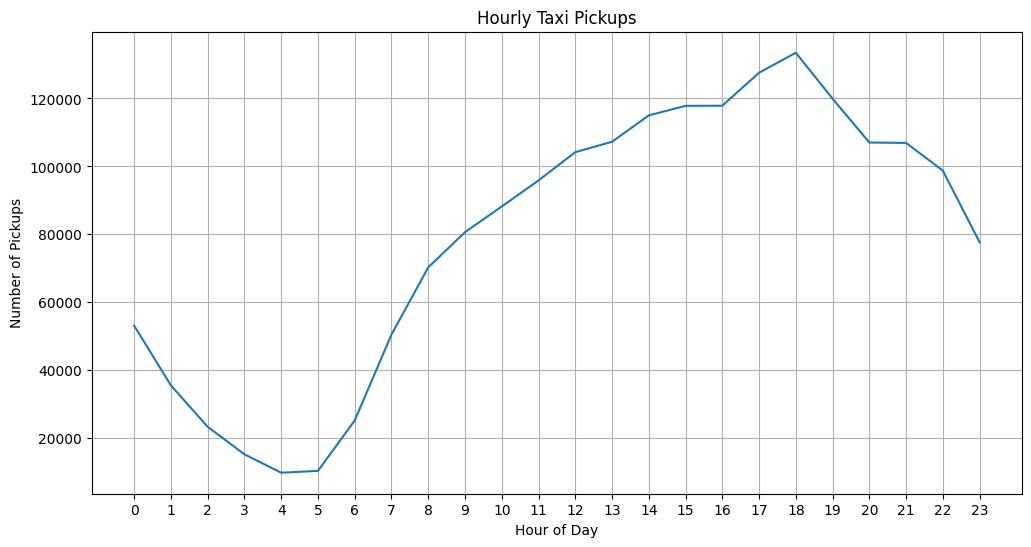

Number of pickups per hour:


,count
pickup_hour,
0,53113
1,35547
2,23369
3,15275
4,9859
5,10410
6,25241
7,50534
8,70296


In [34]:
# Find and show the hourly trends in taxi pickups

# Extract pickup hour
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'], errors='coerce')
df['pickup_hour'] = df['tpep_pickup_datetime'].dt.hour

# Calculate the number of pickups per hour
hourly_pickups = df['pickup_hour'].value_counts().sort_index()

# Visualize the hourly pickups
plt.figure(figsize=(12, 6))
sns.lineplot(x=hourly_pickups.index, y=hourly_pickups.values)
plt.title('Hourly Taxi Pickups')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Pickups')
plt.xticks(range(0, 24))
plt.grid(True)
plt.show()

# Display the hourly pickup counts
print("Number of pickups per hour:")
display(hourly_pickups)

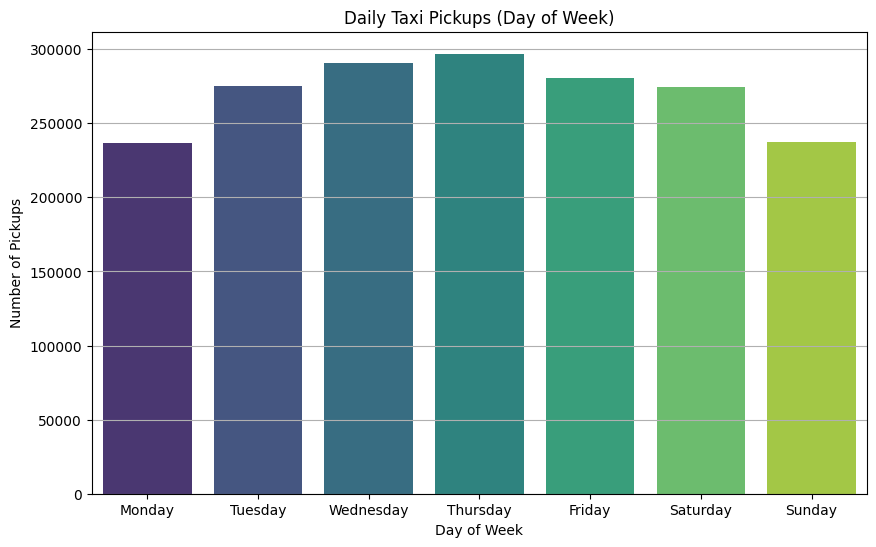

Number of pickups per day of the week:


,count
Monday,236587
Tuesday,274840
Wednesday,290910
Thursday,296877
Friday,280511
Saturday,274501
Sunday,237599


In [35]:
# Find and show the daily trends in taxi pickups (days of the week)

# Extract day of the week (0 = Monday, 6 = Sunday)
df['pickup_day_of_week'] = df['tpep_pickup_datetime'].dt.dayofweek

# Calculate the number of pickups per day of the week
daily_pickups = df['pickup_day_of_week'].value_counts().sort_index()

# Map numerical day of the week to names for better visualization
day_names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
daily_pickups.index = day_names

# Visualize the daily pickups
plt.figure(figsize=(10, 6))
sns.barplot(x=daily_pickups.index, y=daily_pickups.values, palette='viridis')
plt.title('Daily Taxi Pickups (Day of Week)')
plt.xlabel('Day of Week')
plt.ylabel('Number of Pickups')
plt.grid(axis='y')
plt.show()

# Display the daily pickup counts
print("Number of pickups per day of the week:")
display(daily_pickups)

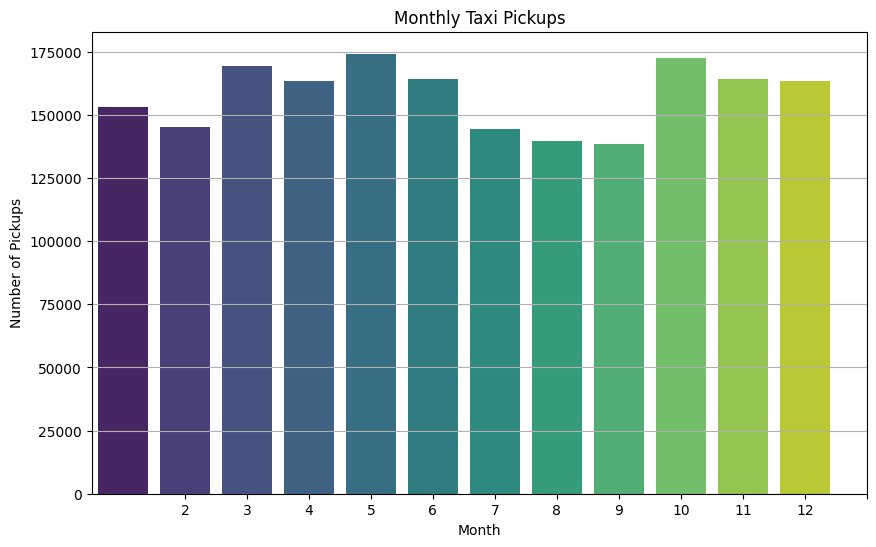

Number of pickups per month:


,count
pickup_month,
1,153152
2,145330
3,169428
4,163329
5,174200
6,164086
7,144325
8,139621
9,138488


In [36]:
# Show the monthly trends in pickups

# Extract month
df['pickup_month'] = df['tpep_pickup_datetime'].dt.month

# Calculate the number of pickups per month
monthly_pickups = df['pickup_month'].value_counts().sort_index()

# Visualize the monthly pickups
plt.figure(figsize=(10, 6))
sns.barplot(x=monthly_pickups.index, y=monthly_pickups.values, palette='viridis')
plt.title('Monthly Taxi Pickups')
plt.xlabel('Month')
plt.ylabel('Number of Pickups')
plt.xticks(range(1, 13))
plt.grid(axis='y')
plt.show()

# Display the monthly pickup counts
print("Number of pickups per month:")
display(monthly_pickups)

##### Financial Analysis

Take a look at the financial parameters like `fare_amount`, `tip_amount`, `total_amount`, and also `trip_distance`. Do these contain zero/negative values?

Number of zero values in financial columns:
- 'fare_amount': 567
- 'tip_amount': 422569
- 'total_amount': 336
- 'trip_distance': 23109

Descriptive statistics for financial columns:


,fare_amount,tip_amount,total_amount,trip_distance
count,1.891825e+06,1.891825e+06,1.891825e+06,1.891825e+06
mean,1.985166e+01,3.581664e+00,2.898974e+01,3.454737e+00
std,1.056651e+02,4.071896e+00,1.065596e+02,4.555745e+00
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,9.300000e+00,1.000000e+00,1.596000e+01,1.060000e+00
50%,1.350000e+01,2.860000e+00,2.100000e+01,1.790000e+00
75%,2.190000e+01,4.450000e+00,3.072000e+01,3.390000e+00
max,1.431635e+05,2.230800e+02,1.431675e+05,2.048600e+02


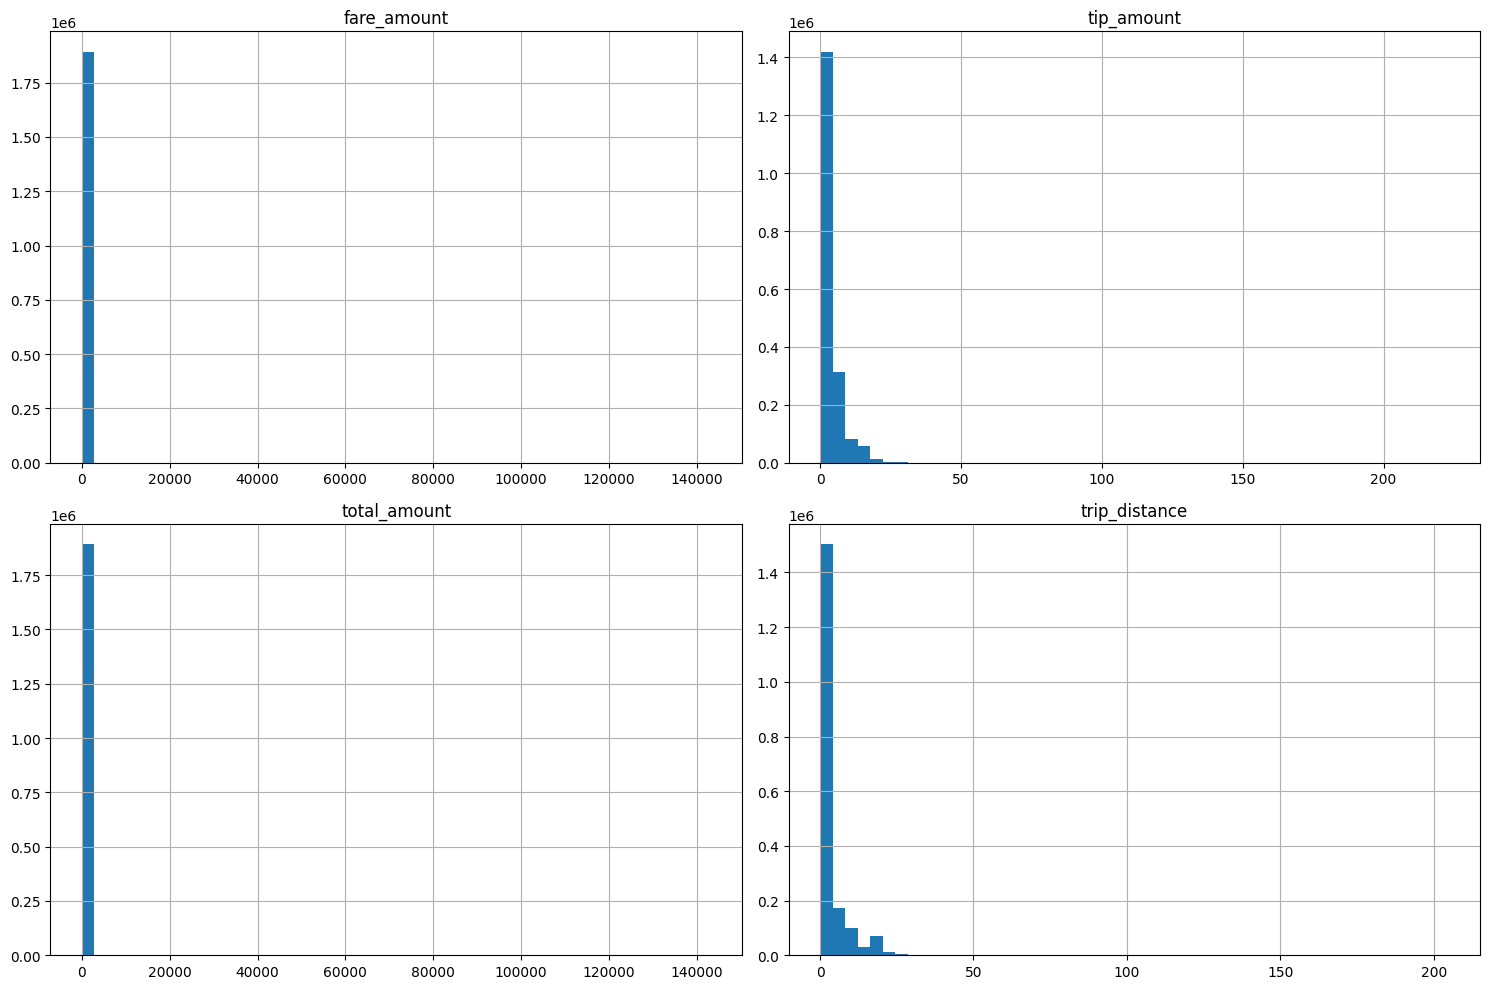

In [37]:
# Analyse the above parameters

# Check for zero values in the financial columns
financial_columns = ['fare_amount', 'tip_amount', 'total_amount', 'trip_distance']
print("Number of zero values in financial columns:")
for col in financial_columns:
    zero_count = (df[col] == 0).sum()
    print(f"- '{col}': {zero_count}")

# Display descriptive statistics for financial columns
print("\nDescriptive statistics for financial columns:")
display(df[financial_columns].describe())

# Visualize the distribution of financial columns (histograms)
df[financial_columns].hist(bins=50, figsize=(15, 10))
plt.tight_layout()
plt.show()

Do you think it is beneficial to create a copy DataFrame leaving out the zero values from these?

**3.1.3** <font color = red>[2 marks]</font> <br>
Filter out the zero values from the above columns.

**Note:** The distance might be 0 in cases where pickup and drop is in the same zone. Do you think it is suitable to drop such cases of zero distance?

In [38]:
# Create a df with non zero entries for the selected parameters.

# Filter out rows where total_amount is zero
df_financial = df[df['total_amount'] > 0].copy()

print("Original DataFrame shape:", df.shape)
print("DataFrame shape after filtering zero total_amount:", df_financial.shape)

# You can now use df_financial for analyses focused on revenue-generating trips.
# For tasks that require all data, continue to use df.

Original DataFrame shape: (1891825, 23)
DataFrame shape after filtering zero total_amount: (1891489, 23)


**3.1.4** <font color = red>[3 marks]</font> <br>
Analyse the monthly revenue (`total_amount`) trend

Monthly Revenue Trend:


,total_amount
pickup_month,
1,4189742.49
2,3967469.85
3,4775326.42
4,4693466.46
5,5107195.54
6,4811902.12
7,4192909.31
8,4085705.07
9,4316934.46


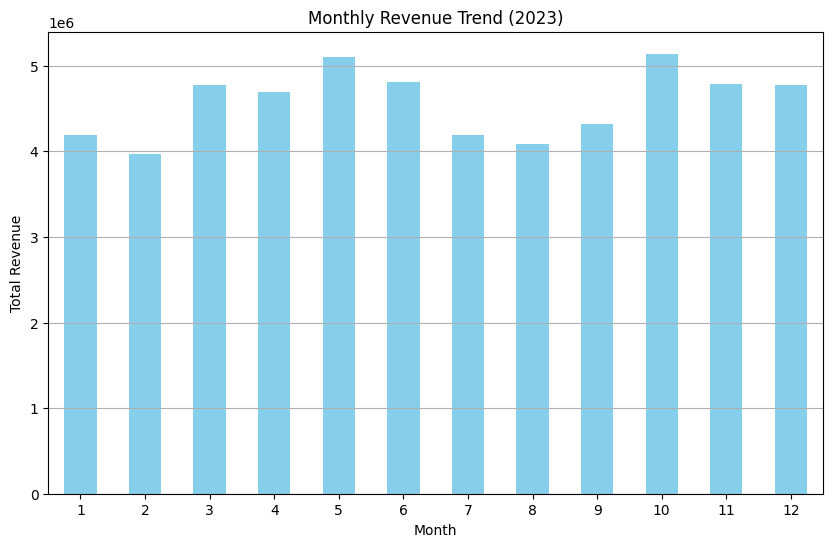

In [39]:
# Group data by month and analyse monthly revenue

# Ensure 'tpep_pickup_datetime' is datetime type (already done, but good to be sure)
df_financial['tpep_pickup_datetime'] = pd.to_datetime(df_financial['tpep_pickup_datetime'])

# Extract month for grouping
df_financial['pickup_month'] = df_financial['tpep_pickup_datetime'].dt.month

# Group by month and sum the total_amount
monthly_revenue = df_financial.groupby('pickup_month')['total_amount'].sum()

# Display the monthly revenue
print("Monthly Revenue Trend:")
display(monthly_revenue)

# Optional: Visualize the monthly revenue trend
plt.figure(figsize=(10, 6))
monthly_revenue.plot(kind='bar', color='skyblue')
plt.title('Monthly Revenue Trend (2023)')
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

**3.1.5** <font color = red>[3 marks]</font> <br>
Show the proportion of each quarter of the year in the revenue

Quarterly Revenue:


,total_amount
pickup_quarter,
1,12932538.76
2,14612564.12
3,12595548.84
4,14702865.40



Proportion of Revenue by Quarter:


,total_amount
pickup_quarter,
1,23.580798
2,26.644105
3,22.966340
4,26.808757


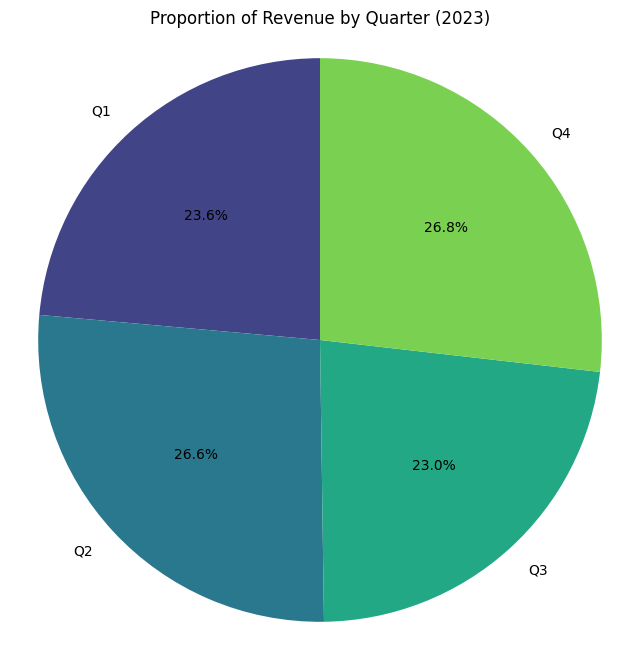

In [40]:
# Calculate proportion of each quarter

# Ensure 'tpep_pickup_datetime' is datetime type
df_financial['tpep_pickup_datetime'] = pd.to_datetime(df_financial['tpep_pickup_datetime'])

# Extract the quarter
df_financial['pickup_quarter'] = df_financial['tpep_pickup_datetime'].dt.quarter

# Group by quarter and sum the total_amount
quarterly_revenue = df_financial.groupby('pickup_quarter')['total_amount'].sum()

# Calculate the total annual revenue
total_annual_revenue = quarterly_revenue.sum()

# Calculate the proportion of revenue for each quarter
quarterly_revenue_proportion = (quarterly_revenue / total_annual_revenue) * 100

# Display the quarterly revenue and proportions
print("Quarterly Revenue:")
display(quarterly_revenue)

print("\nProportion of Revenue by Quarter:")
display(quarterly_revenue_proportion)

# Optional: Visualize the quarterly revenue proportion
plt.figure(figsize=(8, 8))
plt.pie(quarterly_revenue_proportion, labels=[f'Q{q}' for q in quarterly_revenue_proportion.index], autopct='%1.1f%%', startangle=90, colors=sns.color_palette('viridis', len(quarterly_revenue_proportion)))
plt.title('Proportion of Revenue by Quarter (2023)')
plt.axis('equal') # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

**3.1.6** <font color = red>[3 marks]</font> <br>
Visualise the relationship between `trip_distance` and `fare_amount`. Also find the correlation value for these two.

**Hint:** You can leave out the trips with trip_distance = 0

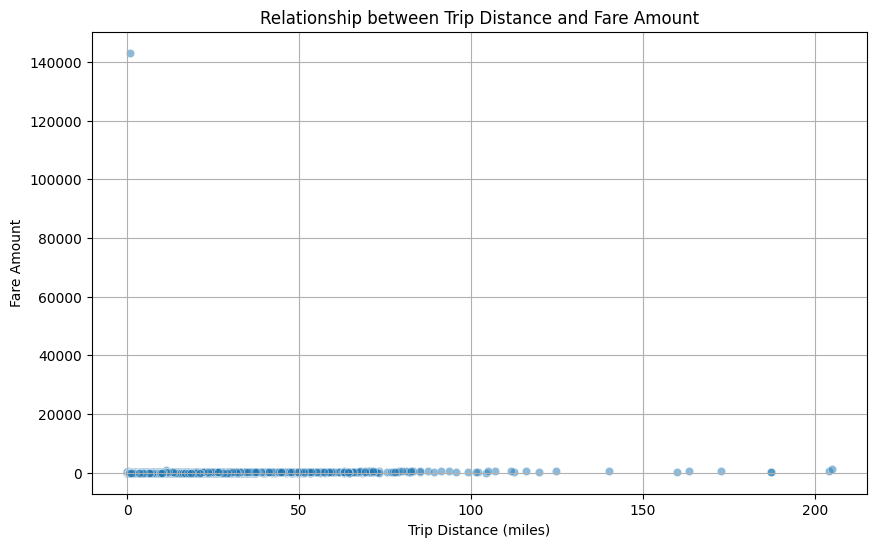


Correlation between Trip Distance and Fare Amount: 0.16


In [41]:
# Show how trip fare is affected by distance

# Filter out trips with zero trip_distance for this analysis
df_filtered_distance = df_financial[df_financial['trip_distance'] > 0].copy()

# Visualize the relationship between trip_distance and fare_amount
plt.figure(figsize=(10, 6))
sns.scatterplot(x='trip_distance', y='fare_amount', data=df_filtered_distance, alpha=0.5)
plt.title('Relationship between Trip Distance and Fare Amount')
plt.xlabel('Trip Distance (miles)')
plt.ylabel('Fare Amount')
plt.grid(True)
plt.show()

# Calculate the correlation between trip_distance and fare_amount
correlation = df_filtered_distance['trip_distance'].corr(df_filtered_distance['fare_amount'])

print(f"\nCorrelation between Trip Distance and Fare Amount: {correlation:.2f}")

**3.1.7** <font color = red>[5 marks]</font> <br>
Find and visualise the correlation between:
1. `fare_amount` and trip duration (pickup time to dropoff time)
2. `fare_amount` and `passenger_count`
3. `tip_amount` and `trip_distance`

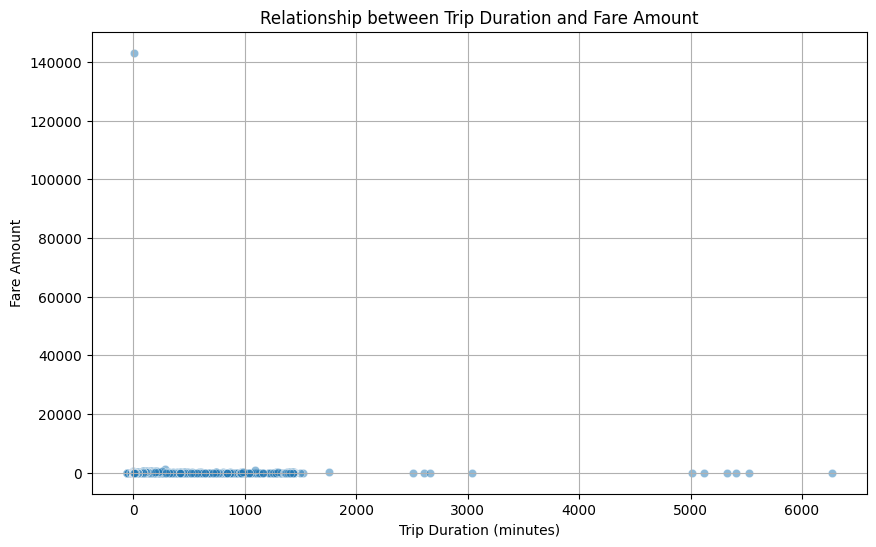


Correlation between Trip Duration and Fare Amount: 0.05


In [43]:
# Show relationship between fare and trip duration

# Convert datetime columns to datetime objects
df_financial['tpep_pickup_datetime'] = pd.to_datetime(df_financial['tpep_pickup_datetime'], errors='coerce')
df_financial['tpep_dropoff_datetime'] = pd.to_datetime(df_financial['tpep_dropoff_datetime'], errors='coerce')

# Calculate trip duration in minutes
df_financial['trip_duration'] = (df_financial['tpep_dropoff_datetime'] - df_financial['tpep_pickup_datetime']).dt.total_seconds() / 60

# Visualize the relationship between trip_duration and fare_amount
plt.figure(figsize=(10, 6))
sns.scatterplot(x='trip_duration', y='fare_amount', data=df_financial, alpha=0.5)
plt.title('Relationship between Trip Duration and Fare Amount')
plt.xlabel('Trip Duration (minutes)')
plt.ylabel('Fare Amount')
plt.grid(True)
plt.show()

# Calculate the correlation between trip_duration and fare_amount
correlation_duration_fare = df_financial['trip_duration'].corr(df_financial['fare_amount'])

print(f"\nCorrelation between Trip Duration and Fare Amount: {correlation_duration_fare:.2f}")

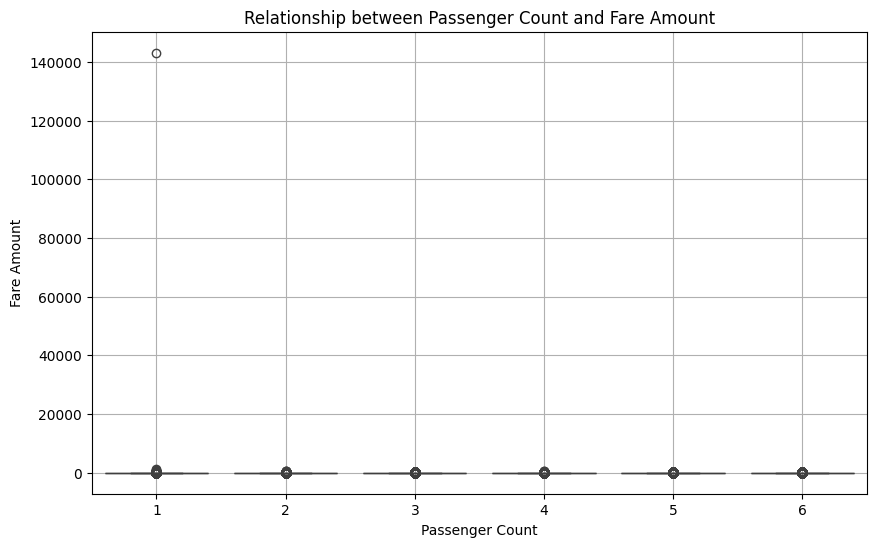


Correlation between Passenger Count and Fare Amount: 0.01


In [44]:
# Show relationship between fare and number of passengers

# Visualize the relationship between passenger_count and fare_amount using a box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='passenger_count', y='fare_amount', data=df_financial)
plt.title('Relationship between Passenger Count and Fare Amount')
plt.xlabel('Passenger Count')
plt.ylabel('Fare Amount')
plt.grid(True)
plt.show()

# Calculate the correlation between passenger_count and fare_amount
correlation_passenger_fare = df_financial['passenger_count'].corr(df_financial['fare_amount'])

print(f"\nCorrelation between Passenger Count and Fare Amount: {correlation_passenger_fare:.2f}")

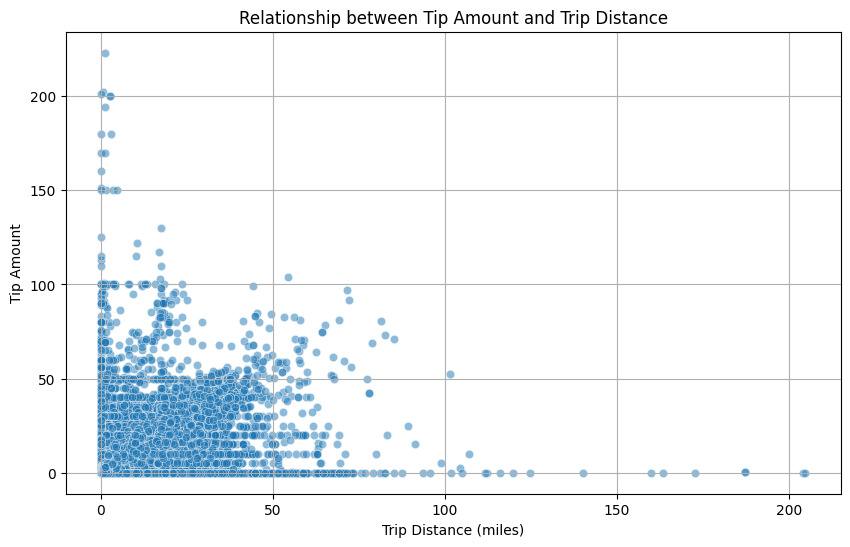


Correlation between Tip Amount and Trip Distance: 0.57


In [45]:
# Show relationship between tip and trip distance

# Visualize the relationship between tip_amount and trip_distance
plt.figure(figsize=(10, 6))
sns.scatterplot(x='trip_distance', y='tip_amount', data=df_financial, alpha=0.5)
plt.title('Relationship between Tip Amount and Trip Distance')
plt.xlabel('Trip Distance (miles)')
plt.ylabel('Tip Amount')
plt.grid(True)
plt.show()

# Calculate the correlation between tip_amount and trip_distance
correlation_tip_distance = df_financial['tip_amount'].corr(df_financial['trip_distance'])

print(f"\nCorrelation between Tip Amount and Trip Distance: {correlation_tip_distance:.2f}")

**3.1.8** <font color = red>[3 marks]</font> <br>
Analyse the distribution of different payment types (`payment_type`)

Distribution of Payment Types:


,count
payment_type,
1,1542600
2,326182
3,8570
4,14137


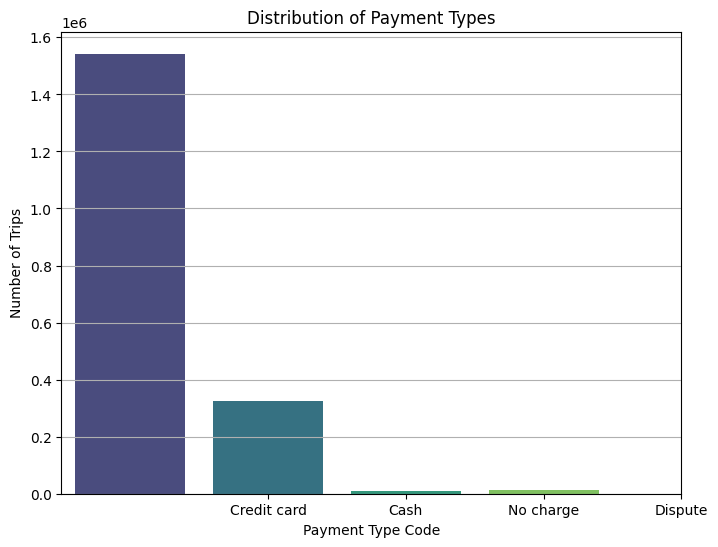

In [46]:
# Analyse the distribution of different payment types (payment_type).

# Mapping payment type codes to descriptions
payment_type_map = {
    1: 'Credit card',
    2: 'Cash',
    3: 'No charge',
    4: 'Dispute'
}

# Calculate the distribution of payment types
payment_type_distribution = df_financial['payment_type'].value_counts().sort_index()

# Display the distribution
print("Distribution of Payment Types:")
display(payment_type_distribution)

# Optional: Visualize the distribution of payment types
plt.figure(figsize=(8, 6))
sns.barplot(x=payment_type_distribution.index, y=payment_type_distribution.values, palette='viridis')
plt.title('Distribution of Payment Types')
plt.xlabel('Payment Type Code')
plt.ylabel('Number of Trips')
plt.xticks(list(payment_type_map.keys()), list(payment_type_map.values()))
plt.grid(axis='y')
plt.show()

- 1= Credit card
- 2= Cash
- 3= No charge
- 4= Dispute



##### Geographical Analysis

For this, you have to use the *taxi_zones.shp* file from the *taxi_zones* folder.

There would be multiple files inside the folder (such as *.shx, .sbx, .sbn* etc). You do not need to import/read any of the files other than the shapefile, *taxi_zones.shp*.

Do not change any folder structure - all the files need to be present inside the folder for it to work.

The folder structure should look like this:
```
Taxi Zones
|- taxi_zones.shp.xml
|- taxi_zones.prj
|- taxi_zones.sbn
|- taxi_zones.shp
|- taxi_zones.dbf
|- taxi_zones.shx
|- taxi_zones.sbx

 ```

 You only need to read the `taxi_zones.shp` file. The *shp* file will utilise the other files by itself.

We will use the *GeoPandas* library for geopgraphical analysis
```
import geopandas as gpd
```

More about geopandas and shapefiles: [About](https://geopandas.org/en/stable/about.html)


Reading the shapefile is very similar to *Pandas*. Use `gpd.read_file()` function to load the data (*taxi_zones.shp*) as a GeoDataFrame. Documentation: [Reading and Writing Files](https://geopandas.org/en/stable/docs/user_guide/io.html)

In [47]:
pip install geopandas

**3.1.9** <font color = red>[2 marks]</font> <br>
Load the shapefile and display it.

In [49]:
# import geopandas as gpd
import geopandas as gpd

# Read the shapefile using geopandas
zones = gpd.read_file('/content/drive/MyDrive/Taxi Project/Data/taxi_zones/taxi_zones.shp') # read the .shp file using gpd
display(zones.head())

,OBJECTID,Shape_Leng,Shape_Area,zone,LocationID,borough,geometry
0,1,0.116357,0.000782,Newark Airport,1,EWR,"POLYGON ((933100.918 192536.086, 933091.011 19..."
1,2,0.433470,0.004866,Jamaica Bay,2,Queens,"MULTIPOLYGON (((1033269.244 172126.008, 103343..."
2,3,0.084341,0.000314,Allerton/Pelham Gardens,3,Bronx,"POLYGON ((1026308.77 256767.698, 1026495.593 2..."
3,4,0.043567,0.000112,Alphabet City,4,Manhattan,"POLYGON ((992073.467 203714.076, 992068.667 20..."
4,5,0.092146,0.000498,Arden Heights,5,Staten Island,"POLYGON ((935843.31 144283.336, 936046.565 144..."


Now, if you look at the DataFrame created, you will see columns like: `OBJECTID`,`Shape_Leng`, `Shape_Area`, `zone`, `LocationID`, `borough`, `geometry`.
<br><br>

Now, the `locationID` here is also what we are using to mark pickup and drop zones in the trip records.

The geometric parameters like shape length, shape area and geometry are used to plot the zones on a map.

This can be easily done using the `plot()` method.

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECTID    263 non-null    int32   
 1   Shape_Leng  263 non-null    float64 
 2   Shape_Area  263 non-null    float64 
 3   zone        263 non-null    object  
 4   LocationID  263 non-null    int32   
 5   borough     263 non-null    object  
 6   geometry    263 non-null    geometry
dtypes: float64(2), geometry(1), int32(2), object(2)
memory usage: 12.5+ KB
None


<Axes: >

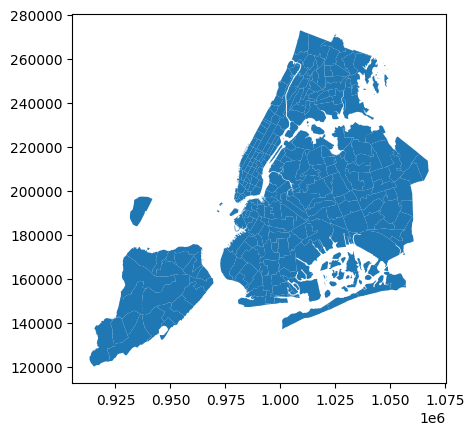

In [54]:
print(zones.info())
zones.plot()

Now, you have to merge the trip records and zones data using the location IDs.



**3.1.10** <font color = red>[3 marks]</font> <br>
Merge the zones data into trip data using the `locationID` and `PULocationID` columns.

In [55]:
# Merge zones and trip records using locationID and PULocationID
# Renaming 'LocationID' in zones to match 'PULocationID' in df_financial for merging
zones_renamed = zones.rename(columns={'LocationID': 'PULocationID'})

# Merging the dataframes
df_merged_pickup = pd.merge(df_financial, zones_renamed, on='PULocationID', how='left')

# Display the first few rows and info of the merged dataframe
display(df_merged_pickup.head())
df_merged_pickup.info()

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,...,pickup_day_of_week,pickup_month,pickup_quarter,trip_duration,OBJECTID,Shape_Leng,Shape_Area,zone,borough,geometry
0,428,2,2023-01-01 00:07:18,2023-01-01 00:23:15,1,7.74,1,N,138,256,...,6,1,1,15.950000,138.0,0.107467,0.000537,LaGuardia Airport,Queens,"MULTIPOLYGON (((1019904.219 225677.983, 102031..."
1,1113,2,2023-01-01 00:16:41,2023-01-01 00:21:46,2,1.24,1,N,161,237,...,6,1,1,5.083333,161.0,0.035804,0.000072,Midtown Center,Manhattan,"POLYGON ((991081.026 214453.698, 990952.644 21..."
2,819,2,2023-01-01 00:14:03,2023-01-01 00:24:36,3,1.44,1,N,237,141,...,6,1,1,10.550000,237.0,0.042213,0.000096,Upper East Side South,Manhattan,"POLYGON ((993633.442 216961.016, 993507.232 21..."
3,3192,2,2023-01-01 00:24:30,2023-01-01 00:29:55,1,0.54,1,N,143,142,...,6,1,1,5.416667,143.0,0.054180,0.000151,Lincoln Square West,Manhattan,"POLYGON ((989338.1 223572.253, 989368.225 2235..."
4,4719,1,2023-01-01 00:42:56,2023-01-01 01:16:33,2,7.10,1,N,246,37,...,6,1,1,33.616667,246.0,0.069467,0.000281,West Chelsea/Hudson Yards,Manhattan,"POLYGON ((983031.177 217138.506, 983640.32 216..."


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1891620 entries, 0 to 1891619
Data columns (total 31 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   Unnamed: 0             int64         
 1   VendorID               int64         
 2   tpep_pickup_datetime   datetime64[ns]
 3   tpep_dropoff_datetime  datetime64[ns]
 4   passenger_count        int64         
 5   trip_distance          float64       
 6   RatecodeID             int64         
 7   store_and_fwd_flag     object        
 8   PULocationID           int64         
 9   DOLocationID           int64         
 10  payment_type           int64         
 11  fare_amount            float64       
 12  extra                  float64       
 13  mta_tax                float64       
 14  tip_amount             float64       
 15  tolls_amount           float64       
 16  improvement_surcharge  float64       
 17  total_amount           float64       
 18  congestion_surcharge  

**3.1.11** <font color = red>[3 marks]</font> <br>
Group data by location IDs to find the total number of trips per location ID

In [56]:
# Group data by location and calculate the number of trips
pickup_counts = df_merged_pickup['PULocationID'].value_counts().reset_index()
pickup_counts.columns = ['PULocationID', 'trip_count']

print("Number of trips per pickup location ID:")
display(pickup_counts.head())

Number of trips per pickup location ID:


,PULocationID,trip_count
0,132,100502
1,237,89707
2,161,88688
3,236,79874
4,162,67854


**3.1.12** <font color = red>[2 marks]</font> <br>
Now, use the grouped data to add number of trips to the GeoDataFrame.

We will use this to plot a map of zones showing total trips per zone.

In [57]:
# Merge trip counts back to the zones GeoDataFrame

# Rename 'LocationID' in zones to match 'PULocationID' in pickup_counts for merging
zones_renamed_for_merge = zones.rename(columns={'LocationID': 'PULocationID'})

# Merge pickup_counts with the zones GeoDataFrame
zones_with_trips = zones_renamed_for_merge.merge(pickup_counts, on='PULocationID', how='left')

# Fill NaN trip counts (for zones with no pickups in the sampled data) with 0
zones_with_trips['trip_count'] = zones_with_trips['trip_count'].fillna(0).astype(int)

# Display the first few rows of the updated GeoDataFrame
print("Zones GeoDataFrame with trip counts:")
display(zones_with_trips.head())

Zones GeoDataFrame with trip counts:


,OBJECTID,Shape_Leng,Shape_Area,zone,PULocationID,borough,geometry,trip_count
0,1,0.116357,0.000782,Newark Airport,1,EWR,"POLYGON ((933100.918 192536.086, 933091.011 19...",222
1,2,0.433470,0.004866,Jamaica Bay,2,Queens,"MULTIPOLYGON (((1033269.244 172126.008, 103343...",2
2,3,0.084341,0.000314,Allerton/Pelham Gardens,3,Bronx,"POLYGON ((1026308.77 256767.698, 1026495.593 2...",41
3,4,0.043567,0.000112,Alphabet City,4,Manhattan,"POLYGON ((992073.467 203714.076, 992068.667 20...",1910
4,5,0.092146,0.000498,Arden Heights,5,Staten Island,"POLYGON ((935843.31 144283.336, 936046.565 144...",13


The next step is creating a color map (choropleth map) showing zones by the number of trips taken.

Again, you can use the `zones.plot()` method for this. [Plot Method GPD](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.plot.html#geopandas.GeoDataFrame.plot)

But first, you need to define the figure and axis for the plot.

`fig, ax = plt.subplots(1, 1, figsize = (12, 10))`

This function creates a figure (fig) and a single subplot (ax)

---

After setting up the figure and axis, we can proceed to plot the GeoDataFrame on this axis. This is done in the next step where we use the plot method of the GeoDataFrame.

You can define the following parameters in the `zones.plot()` method:
```
column = '',
ax = ax,
legend = True,
legend_kwds = {'label': "label", 'orientation': "<horizontal/vertical>"}
```

To display the plot, use `plt.show()`.

**3.1.13** <font color = red>[3 marks]</font> <br>
Plot a color-coded map showing zone-wise trips

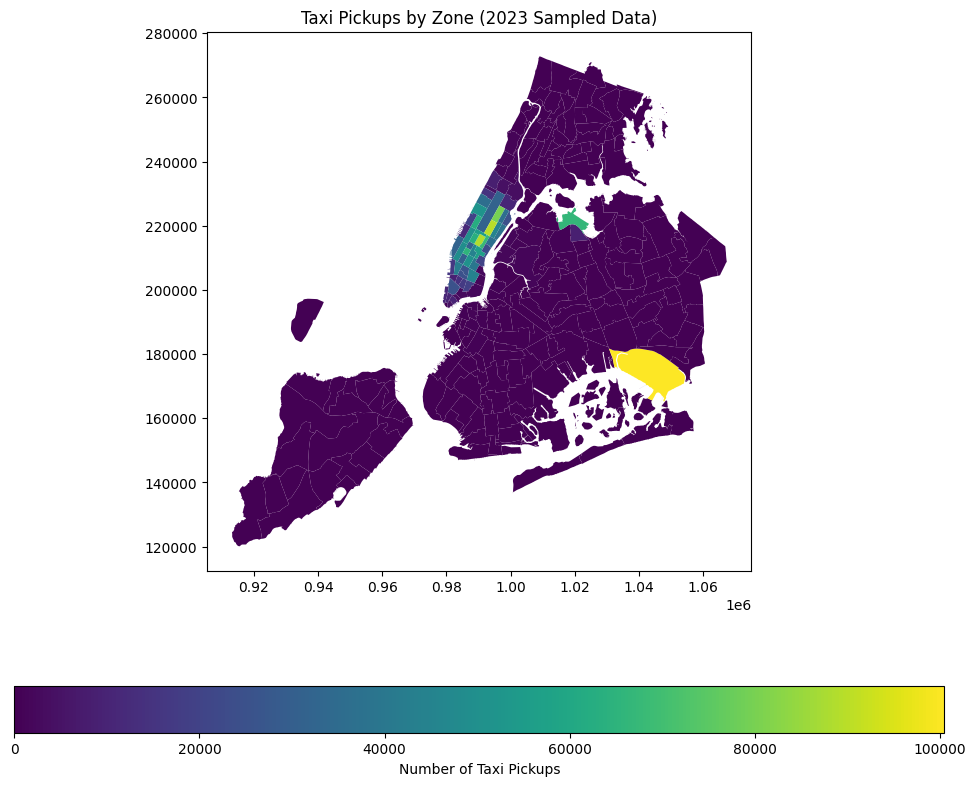

In [58]:
# Define figure and axis
fig, ax = plt.subplots(1, 1, figsize = (12, 10))

# Plot the map and display it
zones_with_trips.plot(column='trip_count', ax=ax, legend=True,
                      legend_kwds={'label': "Number of Taxi Pickups",
                                   'orientation': "horizontal"})
plt.title('Taxi Pickups by Zone (2023 Sampled Data)')
plt.show()

In [59]:
# can you try displaying the zones DF sorted by the number of trips?

print("Top pickup zones by trip count:")
display(zones_with_trips.sort_values(by='trip_count', ascending=False).head(10))

Top pickup zones by trip count:


,OBJECTID,Shape_Leng,Shape_Area,zone,PULocationID,borough,geometry,trip_count
131,132,0.245479,0.002038,JFK Airport,132,Queens,"MULTIPOLYGON (((1032791.001 181085.006, 103283...",100502
236,237,0.042213,0.000096,Upper East Side South,237,Manhattan,"POLYGON ((993633.442 216961.016, 993507.232 21...",89707
160,161,0.035804,0.000072,Midtown Center,161,Manhattan,"POLYGON ((991081.026 214453.698, 990952.644 21...",88688
235,236,0.044252,0.000103,Upper East Side North,236,Manhattan,"POLYGON ((995940.048 221122.92, 995812.322 220...",79874
161,162,0.035270,0.000048,Midtown East,162,Manhattan,"POLYGON ((992224.354 214415.293, 992096.999 21...",67854
137,138,0.107467,0.000537,LaGuardia Airport,138,Queens,"MULTIPOLYGON (((1019904.219 225677.983, 102031...",66644
185,186,0.024696,0.000037,Penn Station/Madison Sq West,186,Manhattan,"POLYGON ((986752.603 210853.699, 986627.863 21...",65440
229,230,0.031028,0.000056,Times Sq/Theatre District,230,Manhattan,"POLYGON ((988786.877 214532.094, 988650.277 21...",63359
141,142,0.038176,0.000076,Lincoln Square East,142,Manhattan,"POLYGON ((989380.305 218980.247, 989359.803 21...",62812
169,170,0.045769,0.000074,Murray Hill,170,Manhattan,"POLYGON ((991999.299 210994.739, 991972.635 21...",56405


Here we have completed the temporal, financial and geographical analysis on the trip records.

**Compile your findings from general analysis below:**

You can consider the following points:

* Busiest hours, days and months
* Trends in revenue collected
* Trends in quarterly revenue
* How fare depends on trip distance, trip duration and passenger counts
* How tip amount depends on trip distance
* Busiest zones


#### **3.2** Detailed EDA: Insights and Strategies
<font color = red>[50 marks]</font> <br>

Having performed basic analyses for finding trends and patterns, we will now move on to some detailed analysis focussed on operational efficiency, pricing strategies, and customer experience.

##### Operational Efficiency

Analyze variations by time of day and location to identify bottlenecks or inefficiencies in routes

**3.2.1** <font color = red>[3 marks]</font> <br>
Identify slow routes by calculating the average time taken by cabs to get from one zone to another at different hours of the day.

Speed on a route *X* for hour *Y* = (*distance of the route X / average trip duration for hour Y*)

In [60]:
# Find routes which have the slowest speeds at different times of the day

# Calculate speed for each trip (miles per minute)
# Avoid division by zero for trip duration
df_merged_pickup['speed_mph'] = (df_merged_pickup['trip_distance'] / df_merged_pickup['trip_duration']) * 60 # Convert minutes to hours

# Handle cases where trip_duration is 0 to avoid infinity speeds (set speed to 0 or NaN)
df_merged_pickup['speed_mph'] = df_merged_pickup['speed_mph'].replace([np.inf, -np.inf], np.nan)
df_merged_pickup['speed_mph'].fillna(0, inplace=True) # Or you could fill with a very low number or NaN

# Extract pickup hour (already done but ensure it's available in df_merged_pickup)
df_merged_pickup['pickup_hour'] = df_merged_pickup['tpep_pickup_datetime'].dt.hour

# Group by pickup zone, dropoff zone, and hour, and calculate average speed
average_speed_by_route_hour = df_merged_pickup.groupby(['PULocationID', 'DOLocationID', 'pickup_hour'])['speed_mph'].mean().reset_index()

# Display the average speeds
print("Average speed (mph) by Pickup Zone, Dropoff Zone, and Hour:")
display(average_speed_by_route_hour.head())

# To identify slow routes, we might want to look at routes with low average speed,
# potentially filtering for routes with a significant number of trips.
# For example, let's look at routes with average speed less than 5 mph.
slow_routes = average_speed_by_route_hour[average_speed_by_route_hour['speed_mph'] < 5].sort_values(by='speed_mph').head(10)

print("\nTop 10 Slowest Routes (Average Speed < 5 mph):")
display(slow_routes)

# Note: A more comprehensive analysis would involve filtering by trip count per route to focus on frequently used slow routes.

Average speed (mph) by Pickup Zone, Dropoff Zone, and Hour:


,PULocationID,DOLocationID,pickup_hour,speed_mph
0,1,1,1,0.000000
1,1,1,3,8.633094
2,1,1,4,0.000000
3,1,1,5,0.900000
4,1,1,6,4.415366



Top 10 Slowest Routes (Average Speed < 5 mph):


,PULocationID,DOLocationID,pickup_hour,speed_mph
41486,114,120,1,-49.195021
117042,244,126,12,-18.504673
94481,213,32,11,-13.514077
70032,151,107,1,-8.327645
14226,50,129,1,-7.195514
41380,114,106,1,-4.899083
91125,198,36,1,-1.939163
90650,193,207,13,0.000000
33138,91,114,17,0.000000
33128,91,91,8,0.000000


How does identifying high-traffic, high-demand routes help us?

**3.2.2** <font color = red>[3 marks]</font> <br>
Calculate the number of trips at each hour of the day and visualise them. Find the busiest hour and show the number of trips for that hour.

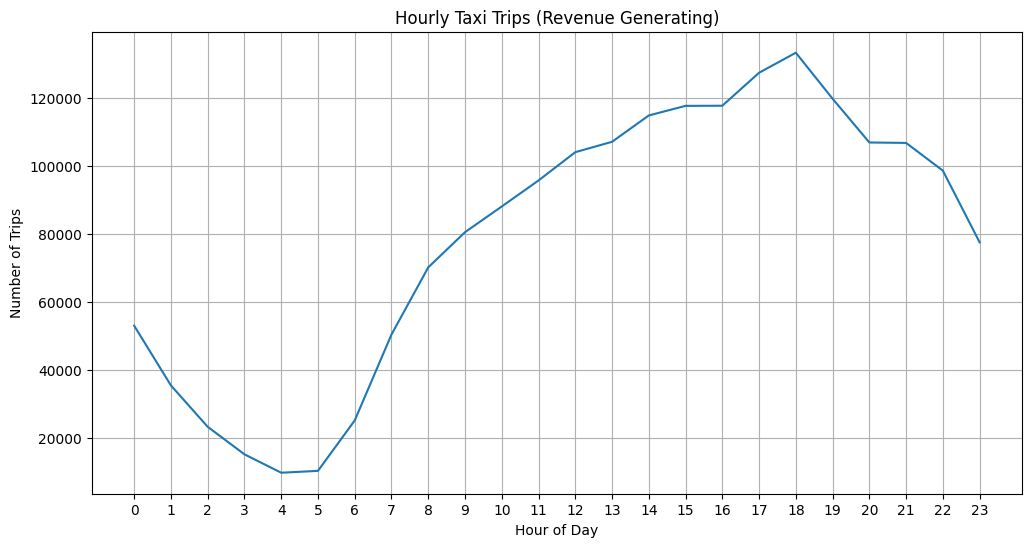

Number of trips per hour (Revenue Generating):


,count
pickup_hour,
0,53106
1,35544
2,23368
3,15272
4,9859
5,10407
6,25238
7,50524
8,70281



Busiest hour: 18 (133436 trips in sampled data)


In [61]:
# Visualise the number of trips per hour and find the busiest hour

# Calculate the number of trips per hour using df_financial
hourly_trips_financial = df_financial['pickup_hour'].value_counts().sort_index()

# Visualize the hourly trips
plt.figure(figsize=(12, 6))
sns.lineplot(x=hourly_trips_financial.index, y=hourly_trips_financial.values)
plt.title('Hourly Taxi Trips (Revenue Generating)')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Trips')
plt.xticks(range(0, 24))
plt.grid(True)
plt.show()

# Find the busiest hour
busiest_hour = hourly_trips_financial.idxmax()
busiest_hour_count = hourly_trips_financial.max()

print("Number of trips per hour (Revenue Generating):")
display(hourly_trips_financial)
print(f"\nBusiest hour: {busiest_hour} ({busiest_hour_count} trips in sampled data)")

Remember, we took a fraction of trips. To find the actual number, you have to scale the number up by the sampling ratio.

**3.2.3** <font color = red>[2 mark]</font> <br>
Find the actual number of trips in the five busiest hours

In [62]:
# Scale up the number of trips

# Fill in the value of your sampling fraction and use that to scale up the numbers
# Assuming sample_fraction was defined earlier (e.g., sample_fraction = 0.05)
# If not, define it here:
# sample_fraction = 0.05

# Get the top 5 busiest hours from the sampled data
top_5_busiest_hours_sampled = hourly_trips_financial.nlargest(5)

# Calculate the actual number of trips by scaling up
# Ensure sample_fraction is not zero to avoid division error
if sample_fraction > 0:
    actual_top_5_busiest_hours = top_5_busiest_hours_sampled / sample_fraction
    print("Actual number of trips in the five busiest hours (scaled up):")
    display(actual_top_5_busiest_hours.round(0)) # Display as integers
else:
    print("Sampling fraction is zero, cannot scale up trip counts.")

Actual number of trips in the five busiest hours (scaled up):


,count
pickup_hour,
18,2668720.0
17,2550860.0
19,2398020.0
16,2356780.0
15,2356000.0


**3.2.4** <font color = red>[3 marks]</font> <br>
Compare hourly traffic pattern on weekdays. Also compare for weekend.

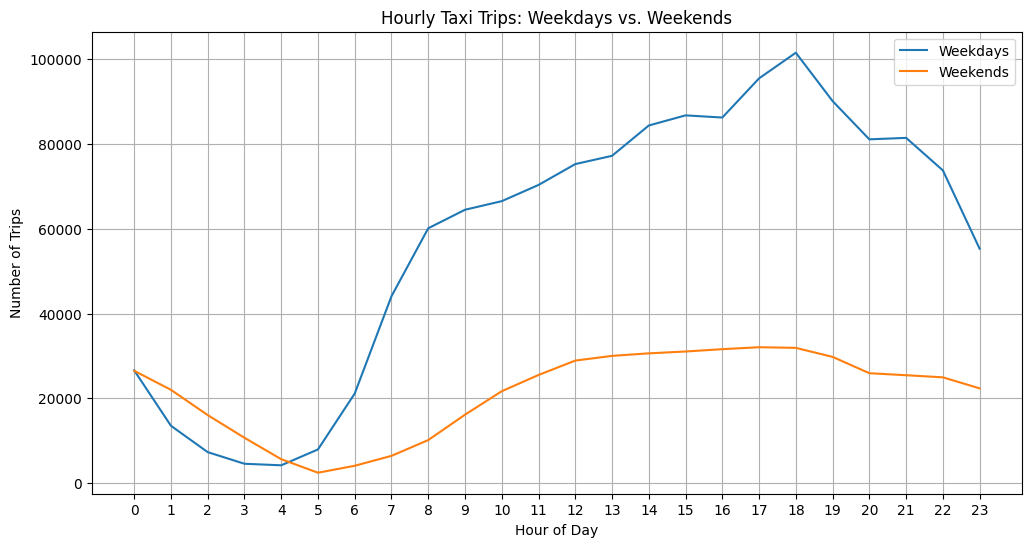

Hourly trip counts for Weekdays:


,count
pickup_hour,
0,26612
1,13532
2,7315
3,4570
4,4208
5,7950
6,21140
7,44090
8,60121



Hourly trip counts for Weekends:


,count
pickup_hour,
0,26494
1,22012
2,16053
3,10702
4,5651
5,2457
6,4098
7,6434
8,10160


In [63]:
# Compare traffic trends for the week days and weekends

# Separate data into weekdays (Monday-Friday, 0-4) and weekends (Saturday-Sunday, 5-6)
df_weekdays = df_financial[df_financial['pickup_day_of_week'].isin(range(5))]
df_weekends = df_financial[df_financial['pickup_day_of_week'].isin(range(5, 7))]

# Calculate hourly trip counts for weekdays and weekends
hourly_trips_weekdays = df_weekdays['pickup_hour'].value_counts().sort_index()
hourly_trips_weekends = df_weekends['pickup_hour'].value_counts().sort_index()

# Visualize the hourly trips for weekdays and weekends
plt.figure(figsize=(12, 6))
sns.lineplot(x=hourly_trips_weekdays.index, y=hourly_trips_weekdays.values, label='Weekdays')
sns.lineplot(x=hourly_trips_weekends.index, y=hourly_trips_weekends.values, label='Weekends')
plt.title('Hourly Taxi Trips: Weekdays vs. Weekends')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Trips')
plt.xticks(range(0, 24))
plt.legend()
plt.grid(True)
plt.show()

print("Hourly trip counts for Weekdays:")
display(hourly_trips_weekdays)

print("\nHourly trip counts for Weekends:")
display(hourly_trips_weekends)

What can you infer from the above patterns? How will finding busy and quiet hours for each day help us?

**3.2.5** <font color = red>[3 marks]</font> <br>
Identify top 10 zones with high hourly pickups. Do the same for hourly dropoffs. Show pickup and dropoff trends in these zones.

Top 10 Pickup Zone IDs: [132, 237, 161, 236, 162, 138, 186, 230, 142, 170]
Top 10 Dropoff Zone IDs: [236, 237, 161, 230, 170, 162, 142, 239, 141, 68]


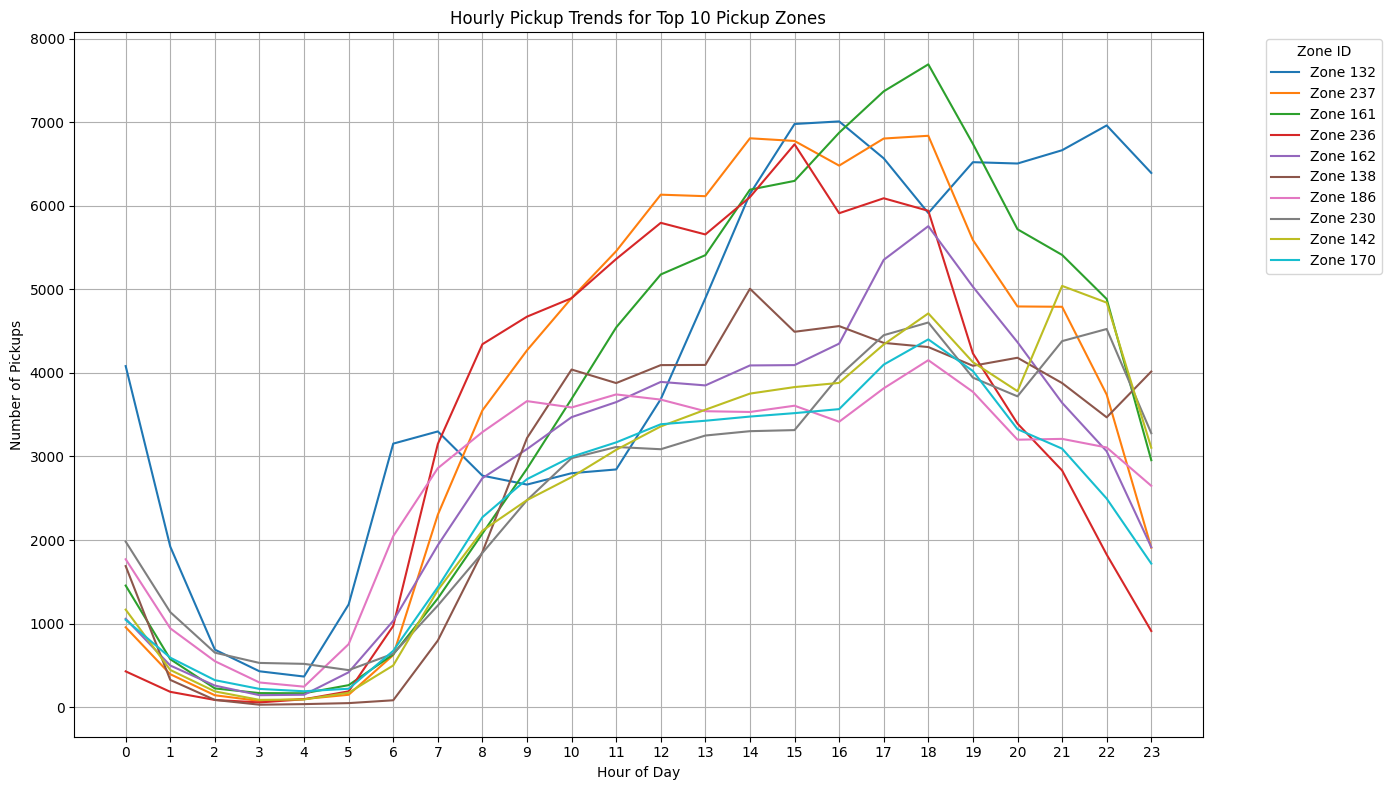

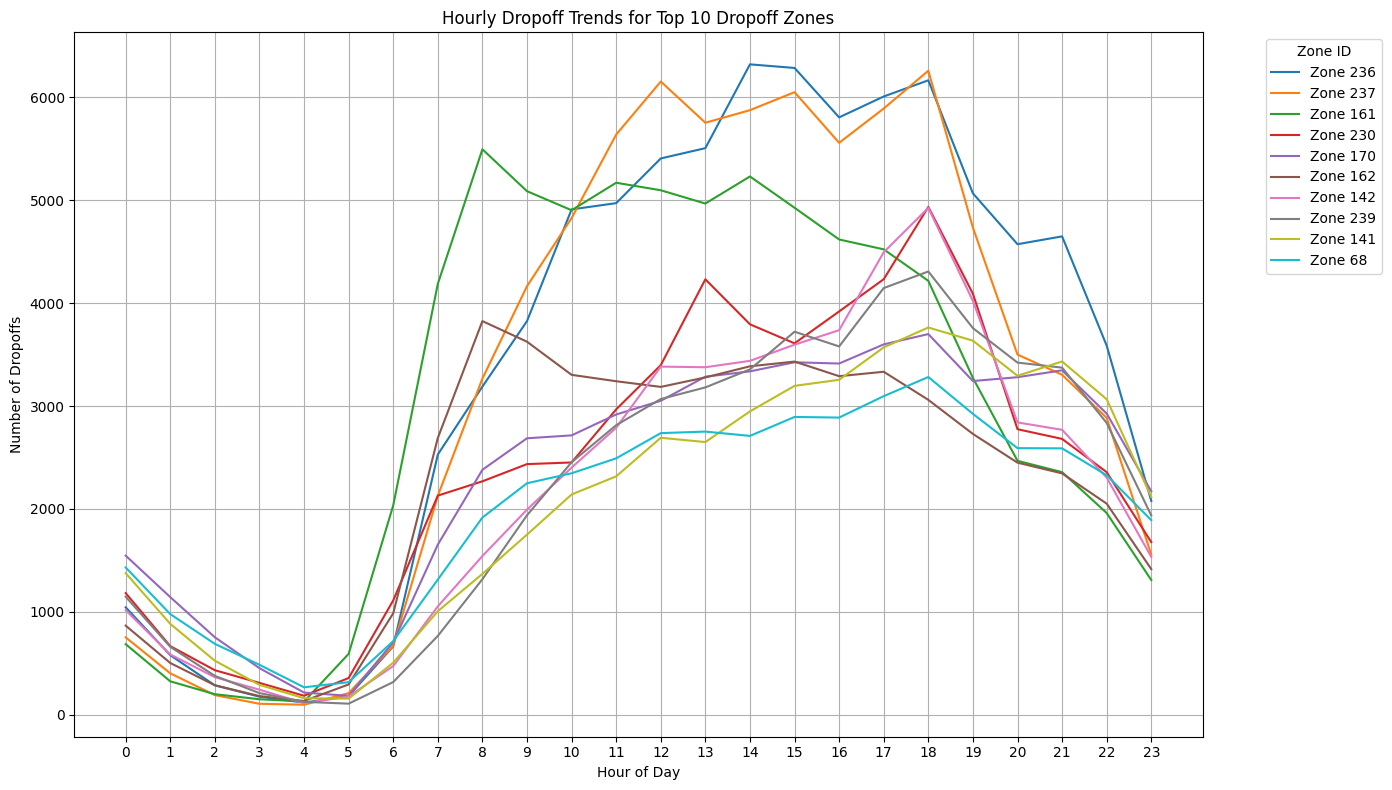

In [64]:
# Find top 10 pickup and dropoff zones

# Calculate hourly pickup counts for each zone
hourly_pickup_counts_by_zone = df_financial.groupby(['PULocationID', 'pickup_hour']).size().unstack(fill_value=0)

# Calculate hourly dropoff counts for each zone
hourly_dropoff_counts_by_zone = df_financial.groupby(['DOLocationID', 'pickup_hour']).size().unstack(fill_value=0)

# Find the top 10 pickup zones based on total daily pickups
top_10_pickup_zones = hourly_pickup_counts_by_zone.sum(axis=1).nlargest(10).index.tolist()

# Find the top 10 dropoff zones based on total daily dropoffs
top_10_dropoff_zones = hourly_dropoff_counts_by_zone.sum(axis=1).nlargest(10).index.tolist()

print("Top 10 Pickup Zone IDs:", top_10_pickup_zones)
print("Top 10 Dropoff Zone IDs:", top_10_dropoff_zones)

# Visualize hourly pickup trends for the top 10 pickup zones
plt.figure(figsize=(14, 8))
for zone_id in top_10_pickup_zones:
    plt.plot(hourly_pickup_counts_by_zone.loc[zone_id], label=f'Zone {zone_id}')
plt.title('Hourly Pickup Trends for Top 10 Pickup Zones')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Pickups')
plt.xticks(range(0, 24))
plt.legend(title='Zone ID', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

# Visualize hourly dropoff trends for the top 10 dropoff zones
plt.figure(figsize=(14, 8))
for zone_id in top_10_dropoff_zones:
    plt.plot(hourly_dropoff_counts_by_zone.loc[zone_id], label=f'Zone {zone_id}')
plt.title('Hourly Dropoff Trends for Top 10 Dropoff Zones')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Dropoffs')
plt.xticks(range(0, 24))
plt.legend(title='Zone ID', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

**3.2.6** <font color = red>[3 marks]</font> <br>
Find the ratio of pickups and dropoffs in each zone. Display the 10 highest (pickup/drop) and 10 lowest (pickup/drop) ratios.

In [65]:
# Find the top 10 and bottom 10 pickup/dropoff ratios

# Calculate total pickups per zone
total_pickups_by_zone = df_financial['PULocationID'].value_counts().reset_index()
total_pickups_by_zone.columns = ['LocationID', 'total_pickups']

# Calculate total dropoffs per zone
total_dropoffs_by_zone = df_financial['DOLocationID'].value_counts().reset_index()
total_dropoffs_by_zone.columns = ['LocationID', 'total_dropoffs']

# Merge pickup and dropoff counts
pickup_dropoff_counts = pd.merge(total_pickups_by_zone, total_dropoffs_by_zone, on='LocationID', how='outer').fillna(0)

# Calculate the pickup/dropoff ratio
# Add a small epsilon to avoid division by zero if a zone has 0 dropoffs
pickup_dropoff_counts['pickup_dropoff_ratio'] = pickup_dropoff_counts['total_pickups'] / (pickup_dropoff_counts['total_dropoffs'] + 1e-9)

# Display zones with the 10 highest pickup/dropoff ratios
print("Zones with the 10 highest Pickup/Dropoff Ratios:")
display(pickup_dropoff_counts.sort_values(by='pickup_dropoff_ratio', ascending=False).head(10))

# Display zones with the 10 lowest pickup/dropoff ratios
print("\nZones with the 10 lowest Pickup/Dropoff Ratios:")
display(pickup_dropoff_counts.sort_values(by='pickup_dropoff_ratio', ascending=True).head(10))

Zones with the 10 highest Pickup/Dropoff Ratios:


,LocationID,total_pickups,total_dropoffs,pickup_dropoff_ratio
194,199,2.0,0.0,2.000000e+09
69,70,8679.0,1023.0,8.483871e+00
127,132,100502.0,21622.0,4.648136e+00
133,138,66644.0,23038.0,2.892786e+00
181,186,65440.0,41476.0,1.577780e+00
109,114,24984.0,18066.0,1.382929e+00
42,43,31589.0,23012.0,1.372719e+00
244,249,41876.0,31511.0,1.328933e+00
157,162,67854.0,53902.0,1.258840e+00
156,161,88688.0,73908.0,1.199978e+00



Zones with the 10 lowest Pickup/Dropoff Ratios:


,LocationID,total_pickups,total_dropoffs,pickup_dropoff_ratio
29,30,0.0,20.0,0.000000
240,245,0.0,30.0,0.000000
98,99,0.0,3.0,0.000000
171,176,0.0,12.0,0.000000
216,221,1.0,33.0,0.030303
252,257,29.0,792.0,0.036616
105,109,1.0,26.0,0.038462
0,1,222.0,5538.0,0.040087
110,115,1.0,24.0,0.041667
26,27,2.0,42.0,0.047619


**3.2.7** <font color = red>[3 marks]</font> <br>
Identify zones with high pickup and dropoff traffic during night hours (11PM to 5AM)

In [66]:
# During night hours (11pm to 5am) find the top 10 pickup and dropoff zones
# Note that the top zones should be of night hours and not the overall top zones

# Filter data for night hours (23, 0, 1, 2, 3, 4)
night_hours_df = df_financial[df_financial['pickup_hour'].isin([23, 0, 1, 2, 3, 4])].copy()

# Calculate pickup counts during night hours
night_pickup_counts = night_hours_df['PULocationID'].value_counts().reset_index()
night_pickup_counts.columns = ['PULocationID', 'night_trip_count']

# Calculate dropoff counts during night hours
night_dropoff_counts = night_hours_df['DOLocationID'].value_counts().reset_index()
night_dropoff_counts.columns = ['DOLocationID', 'night_trip_count']

# Display top 10 pickup zones during night hours
print("Top 10 Pickup Zones during Night Hours (11 PM - 5 AM):")
display(night_pickup_counts.head(10))

# Display top 10 dropoff zones during night hours
print("\nTop 10 Dropoff Zones during Night Hours (11 PM - 5 AM):")
display(night_dropoff_counts.head(10))

Top 10 Pickup Zones during Night Hours (11 PM - 5 AM):


,PULocationID,night_trip_count
0,79,15876
1,132,13880
2,249,12843
3,48,10228
4,148,9899
5,114,9046
6,230,8096
7,186,6452
8,164,6200
9,138,6182



Top 10 Dropoff Zones during Night Hours (11 PM - 5 AM):


,DOLocationID,night_trip_count
0,79,8557
1,48,6901
2,170,6288
3,107,5864
4,68,5748
5,141,5358
6,263,5070
7,249,5061
8,148,4480
9,239,4464


Now, let us find the revenue share for the night time hours and the day time hours. After this, we will move to deciding a pricing strategy.

**3.2.8** <font color = red>[2 marks]</font> <br>
Find the revenue share for nighttime and daytime hours.

In [67]:
# Filter for night hours (11 PM to 5 AM)

# Define night hours (11 PM to 5 AM) and daytime hours
night_hours = [23, 0, 1, 2, 3, 4]
daytime_hours = [hour for hour in range(24) if hour not in night_hours]

# Filter df_financial for night and daytime trips
night_trips_df = df_financial[df_financial['pickup_hour'].isin(night_hours)].copy()
daytime_trips_df = df_financial[df_financial['pickup_hour'].isin(daytime_hours)].copy()

# Calculate total revenue for night and daytime
night_revenue = night_trips_df['total_amount'].sum()
daytime_revenue = daytime_trips_df['total_amount'].sum()
total_revenue = df_financial['total_amount'].sum()

# Calculate the revenue share for night and daytime
night_revenue_share = (night_revenue / total_revenue) * 100
daytime_revenue_share = (daytime_revenue / total_revenue) * 100

print(f"Total Revenue: {total_revenue:,.2f}")
print(f"Nighttime Revenue (11 PM - 5 AM): {night_revenue:,.2f}")
print(f"Daytime Revenue (5 AM - 11 PM): {daytime_revenue:,.2f}")
print(f"\nNighttime Revenue Share: {night_revenue_share:.2f}%")
print(f"Daytime Revenue Share: {daytime_revenue_share:.2f}%")

Total Revenue: 54,843,517.12
Nighttime Revenue (11 PM - 5 AM): 6,236,959.03
Daytime Revenue (5 AM - 11 PM): 48,606,558.09

Nighttime Revenue Share: 11.37%
Daytime Revenue Share: 88.63%


##### Pricing Strategy

**3.2.9** <font color = red>[2 marks]</font> <br>
For the different passenger counts, find the average fare per mile per passenger.

For instance, suppose the average fare per mile for trips with 3 passengers is 3 USD/mile, then the fare per mile per passenger will be 1 USD/mile.

Average Fare per Mile per Passenger for different Passenger Counts:


,fare_per_mile_per_passenger
passenger_count,
1,11.071761
2,6.432551
3,3.866040
4,4.287607
5,1.720289
6,1.349539


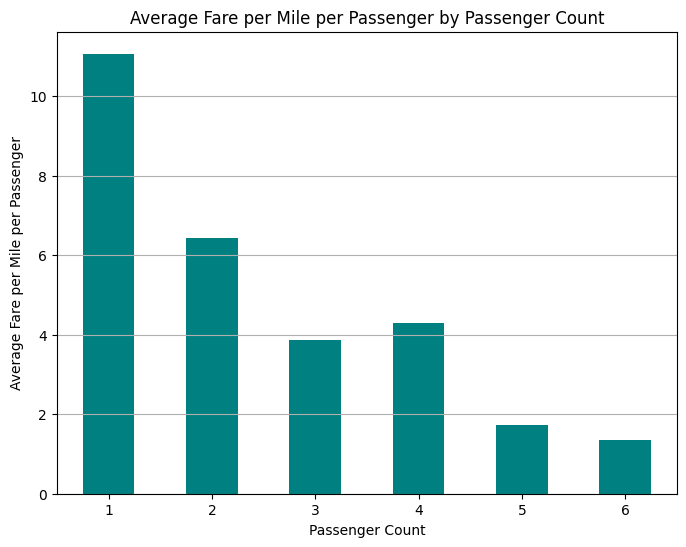

In [68]:
# Analyse the fare per mile per passenger for different passenger counts

# Calculate fare per mile
df_financial['fare_per_mile'] = df_financial['fare_amount'] / (df_financial['trip_distance'] + 1e-9) # Add epsilon to avoid division by zero

# Filter out trips with near zero trip distance for meaningful per-mile calculation
df_filtered_distance_pricing = df_financial[df_financial['trip_distance'] > 0].copy()

# Calculate fare per mile per passenger
df_filtered_distance_pricing['fare_per_mile_per_passenger'] = df_filtered_distance_pricing['fare_amount'] / (df_filtered_distance_pricing['trip_distance'] * df_filtered_distance_pricing['passenger_count'] + 1e-9) # Add epsilon

# Group by passenger count and find the average fare per mile per passenger
average_fare_per_mile_per_passenger = df_filtered_distance_pricing.groupby('passenger_count')['fare_per_mile_per_passenger'].mean()

print("Average Fare per Mile per Passenger for different Passenger Counts:")
display(average_fare_per_mile_per_passenger)

# Optional: Visualize the average fare per mile per passenger by passenger count
plt.figure(figsize=(8, 6))
average_fare_per_mile_per_passenger.plot(kind='bar', color='teal')
plt.title('Average Fare per Mile per Passenger by Passenger Count')
plt.xlabel('Passenger Count')
plt.ylabel('Average Fare per Mile per Passenger')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

**3.2.10** <font color = red>[3 marks]</font> <br>
Find the average fare per mile by hours of the day and by days of the week

Average Fare per Mile by Hour of Day:


,fare_per_mile
pickup_hour,
0,10.796915
1,11.368836
2,9.929916
3,10.828666
4,13.704125
5,15.264315
6,11.094830
7,10.321657
8,10.402323


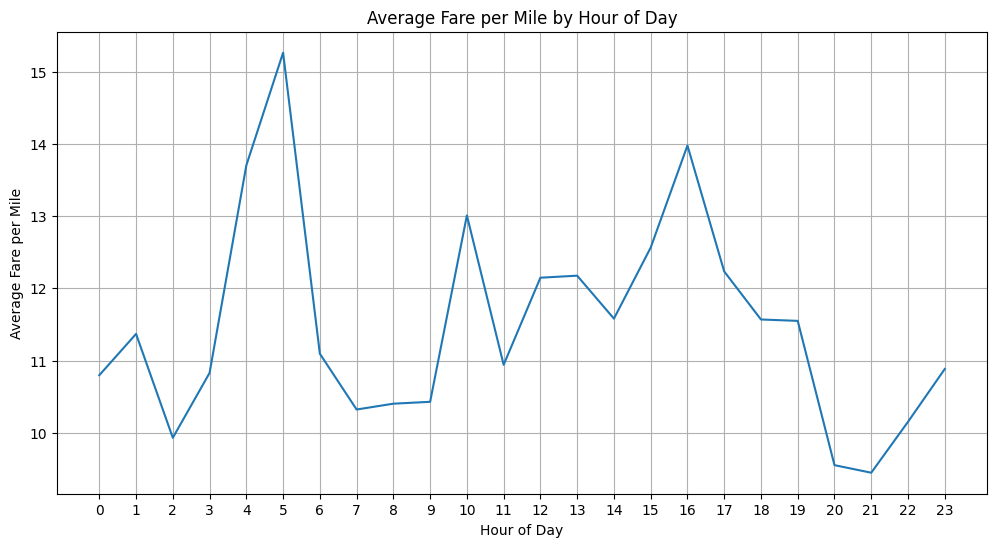


Average Fare per Mile by Day of Week:


,fare_per_mile
Monday,11.007816
Tuesday,12.227216
Wednesday,11.129272
Thursday,11.227030
Friday,10.971066
Saturday,10.957131
Sunday,12.698118


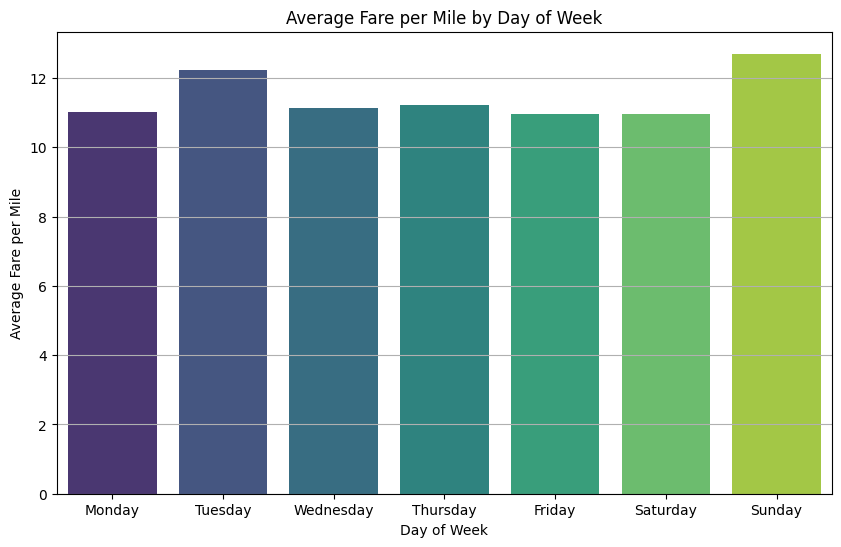

In [69]:
# Compare the average fare per mile for different days and for different times of the day

# Ensure 'fare_per_mile' is calculated (it was calculated in the previous step, but let's ensure it's available and handle potential zero distance)
# If 'fare_per_mile' column does not exist or needs recalculation on df_financial:
if 'fare_per_mile' not in df_financial.columns:
    df_financial['fare_per_mile'] = df_financial['fare_amount'] / (df_financial['trip_distance'] + 1e-9)

# Filter out trips with near zero trip distance for meaningful per-mile calculation
df_filtered_distance_pricing = df_financial[df_financial['trip_distance'] > 0].copy()


# Group by pickup hour and calculate average fare per mile
average_fare_per_mile_hourly = df_filtered_distance_pricing.groupby('pickup_hour')['fare_per_mile'].mean()

print("Average Fare per Mile by Hour of Day:")
display(average_fare_per_mile_hourly)

# Visualize the average fare per mile by hour
plt.figure(figsize=(12, 6))
average_fare_per_mile_hourly.plot(kind='line')
plt.title('Average Fare per Mile by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Average Fare per Mile')
plt.xticks(range(0, 24))
plt.grid(True)
plt.show()

# Group by pickup day of week and calculate average fare per mile
average_fare_per_mile_daily = df_filtered_distance_pricing.groupby('pickup_day_of_week')['fare_per_mile'].mean()

# Map numerical day of the week to names for better display
day_names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
average_fare_per_mile_daily.index = day_names

print("\nAverage Fare per Mile by Day of Week:")
display(average_fare_per_mile_daily)

# Visualize the average fare per mile by day of week
plt.figure(figsize=(10, 6))
sns.barplot(x=average_fare_per_mile_daily.index, y=average_fare_per_mile_daily.values, palette='viridis')
plt.title('Average Fare per Mile by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Average Fare per Mile')
plt.grid(axis='y')
plt.show()

**3.2.11** <font color = red>[3 marks]</font> <br>
Analyse the average fare per mile for the different vendors for different hours of the day

Average Fare per Mile by Vendor and Hour of Day:


pickup_hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
VendorID,,,,,,,,,,,,,,,,,,,,,
1,6.769405,7.068426,7.012826,6.506603,7.698349,7.325573,6.620536,7.196232,8.106129,8.379437,...,8.640181,8.795151,8.828965,8.638896,8.430096,7.901212,7.456829,7.294591,6.972876,6.897783
2,11.919049,12.563202,10.772361,12.054364,15.660000,18.427734,12.937770,11.533608,11.258857,11.189826,...,12.618898,13.883735,15.771168,13.440717,12.591816,12.698080,10.189067,10.069591,11.044107,12.032313


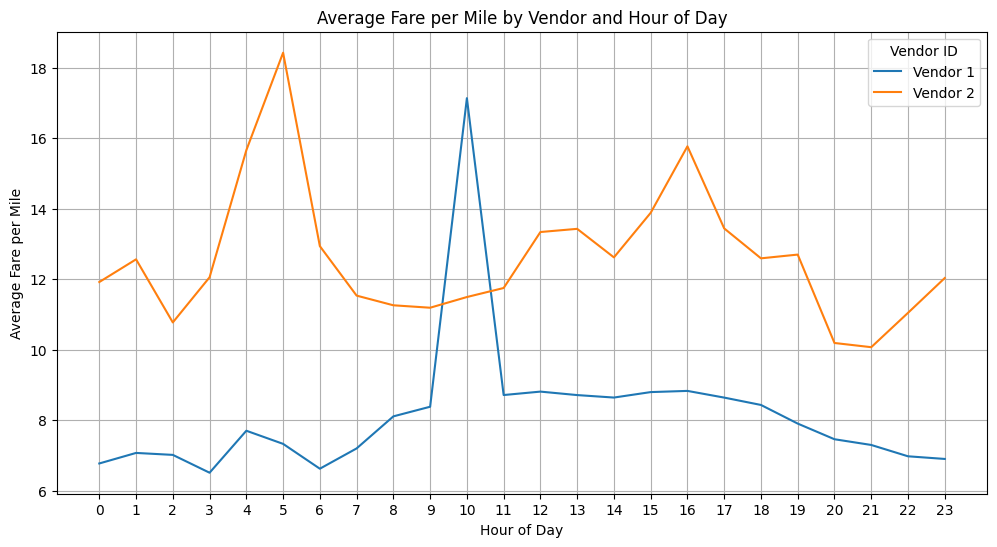

In [70]:
# Compare fare per mile for different vendors

# Group by VendorID and pickup_hour and calculate the average fare per mile
average_fare_per_mile_vendor_hourly = df_filtered_distance_pricing.groupby(['VendorID', 'pickup_hour'])['fare_per_mile'].mean().unstack()

print("Average Fare per Mile by Vendor and Hour of Day:")
display(average_fare_per_mile_vendor_hourly)

# Optional: Visualize the average fare per mile by vendor and hour
plt.figure(figsize=(12, 6))
for vendor_id in average_fare_per_mile_vendor_hourly.index:
    plt.plot(average_fare_per_mile_vendor_hourly.loc[vendor_id], label=f'Vendor {vendor_id}')

plt.title('Average Fare per Mile by Vendor and Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Average Fare per Mile')
plt.xticks(range(0, 24))
plt.legend(title='Vendor ID')
plt.grid(True)
plt.show()

**3.2.12** <font color = red>[5 marks]</font> <br>
Compare the fare rates of the different vendors in a tiered fashion. Analyse the average fare per mile for distances upto 2 miles. Analyse the fare per mile for distances from 2 to 5 miles. And then for distances more than 5 miles.


Average Fare per Mile by Vendor and Distance Tier:


distance_tier,0-2 miles,2-5 miles,>5 miles
VendorID,,,
1,10.825504,6.451384,4.435003
2,17.973275,6.556597,4.504436


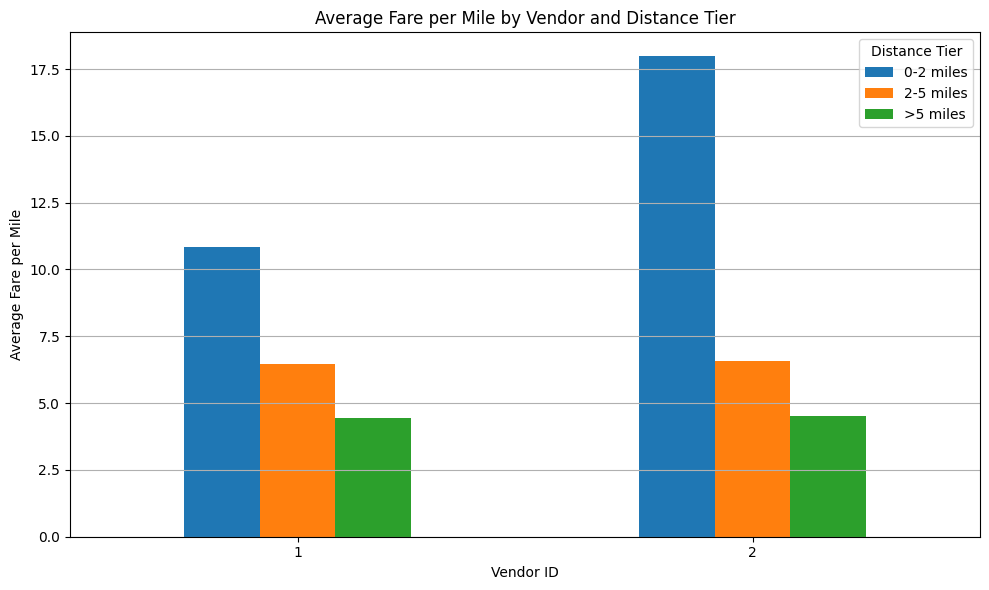

In [71]:
# Defining distance tiers

# Define distance tiers
distance_tiers = [0, 2, 5, df_filtered_distance_pricing['trip_distance'].max()]
tier_labels = ['0-2 miles', '2-5 miles', '>5 miles']

# Categorize trips into distance tiers
df_filtered_distance_pricing['distance_tier'] = pd.cut(df_filtered_distance_pricing['trip_distance'], bins=distance_tiers, labels=tier_labels, right=False)

# Group by VendorID and distance tier and calculate the average fare per mile
average_fare_per_mile_vendor_tier = df_filtered_distance_pricing.groupby(['VendorID', 'distance_tier'])['fare_per_mile'].mean().unstack()

print("Average Fare per Mile by Vendor and Distance Tier:")
display(average_fare_per_mile_vendor_tier)

# Optional: Visualize the average fare per mile by vendor and distance tier
average_fare_per_mile_vendor_tier.plot(kind='bar', figsize=(10, 6))
plt.title('Average Fare per Mile by Vendor and Distance Tier')
plt.xlabel('Vendor ID')
plt.ylabel('Average Fare per Mile')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.legend(title='Distance Tier')
plt.tight_layout()
plt.show()

##### Customer Experience and Other Factors

**3.2.13** <font color = red>[5 marks]</font> <br>
Analyse average tip percentages based on trip distances, passenger counts and time of pickup. What factors lead to low tip percentages?

Average Tip Percentage by Trip Distance:


,tip_percentage
distance_bin,
0-1 mile,27.940917
1-2 miles,21.339494
2-5 miles,18.820598
5-10 miles,19.423557
10-20 miles,16.066112
>20 miles,14.075973



Average Tip Percentage by Passenger Count:


,tip_percentage
passenger_count,
1,21.933279
2,20.423429
3,19.001945
4,17.363325
5,20.500803
6,20.573144



Average Tip Percentage by Pickup Hour:


,tip_percentage
pickup_hour,
0,26.387693
1,21.061662
2,20.790957
3,20.844121
4,19.088312
5,17.473273
6,18.294263
7,19.567396
8,19.979374


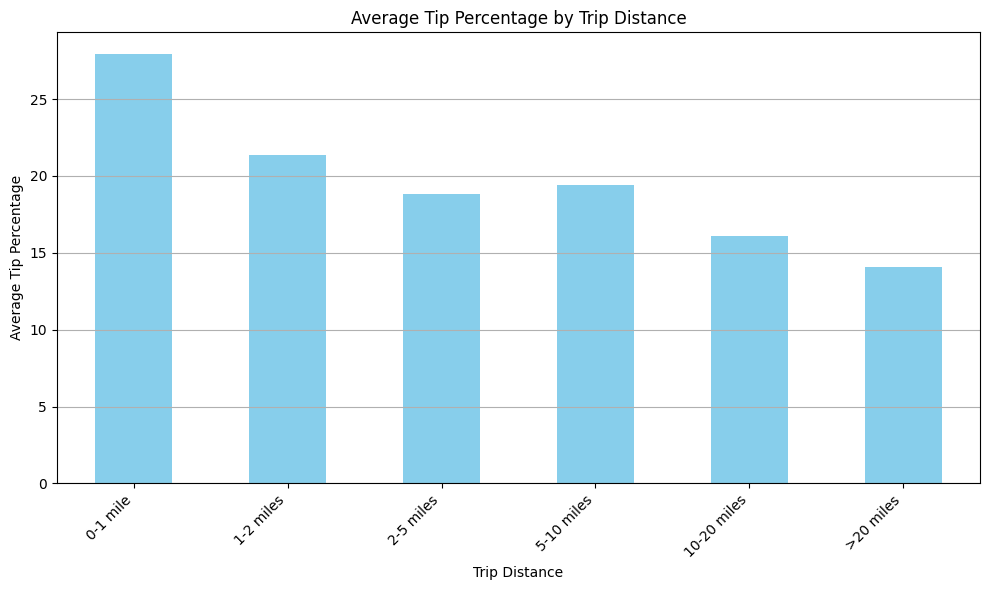

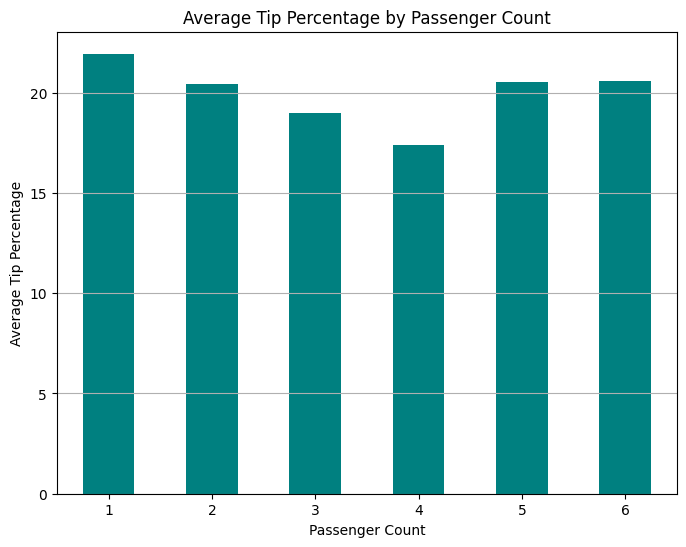

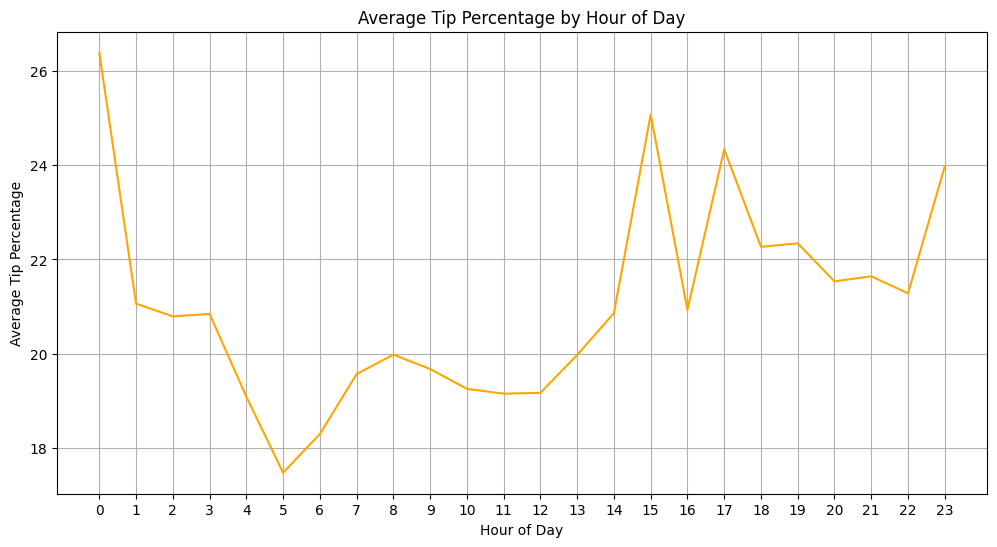

In [72]:
#  Analyze tip percentages based on distances, passenger counts and pickup times

# Calculate tip percentage (tip_amount / fare_amount * 100)
# Add a small epsilon to avoid division by zero if fare_amount is 0
df_financial['tip_percentage'] = (df_financial['tip_amount'] / (df_financial['fare_amount'] + 1e-9)) * 100

# Handle cases where fare_amount and tip_amount are both 0 (tip percentage is undefined or 0)
df_financial['tip_percentage'].fillna(0, inplace=True) # Fill NaN with 0, assuming no tip if fare is 0
df_financial.loc[df_financial['fare_amount'] == 0, 'tip_percentage'] = 0 # Explicitly set to 0 where fare is 0

# Analyze average tip percentage by trip distance
print("Average Tip Percentage by Trip Distance:")
# Group into distance bins for better visualization
distance_bins = [0, 1, 2, 5, 10, 20, df_financial['trip_distance'].max()]
distance_labels = ['0-1 mile', '1-2 miles', '2-5 miles', '5-10 miles', '10-20 miles', '>20 miles']
df_financial['distance_bin'] = pd.cut(df_financial['trip_distance'], bins=distance_bins, labels=distance_labels, right=False)

average_tip_percentage_by_distance = df_financial.groupby('distance_bin')['tip_percentage'].mean()
display(average_tip_percentage_by_distance)

# Analyze average tip percentage by passenger count
print("\nAverage Tip Percentage by Passenger Count:")
average_tip_percentage_by_passenger = df_financial.groupby('passenger_count')['tip_percentage'].mean()
display(average_tip_percentage_by_passenger)

# Analyze average tip percentage by pickup hour
print("\nAverage Tip Percentage by Pickup Hour:")
average_tip_percentage_by_hour = df_financial.groupby('pickup_hour')['tip_percentage'].mean()
display(average_tip_percentage_by_hour)

# Visualize average tip percentage by distance bin
plt.figure(figsize=(10, 6))
average_tip_percentage_by_distance.plot(kind='bar', color='skyblue')
plt.title('Average Tip Percentage by Trip Distance')
plt.xlabel('Trip Distance')
plt.ylabel('Average Tip Percentage')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# Visualize average tip percentage by passenger count
plt.figure(figsize=(8, 6))
average_tip_percentage_by_passenger.plot(kind='bar', color='teal')
plt.title('Average Tip Percentage by Passenger Count')
plt.xlabel('Passenger Count')
plt.ylabel('Average Tip Percentage')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

# Visualize average tip percentage by pickup hour
plt.figure(figsize=(12, 6))
average_tip_percentage_by_hour.plot(kind='line', color='orange')
plt.title('Average Tip Percentage by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Average Tip Percentage')
plt.xticks(range(0, 24))
plt.grid(True)
plt.show()

Additional analysis [optional]: Let's try comparing cases of low tips with cases of high tips to find out if we find a clear aspect that drives up the tipping behaviours

Number of trips with tip percentage < 10%: 506815
Number of trips with tip percentage > 25%: 844642

Descriptive Statistics Comparison (Low Tip vs. High Tip):

Low Tip Trips:


,trip_distance,trip_duration,fare_amount,passenger_count,pickup_hour
count,506815.000000,506815.000000,506815.000000,506815.000000,506815.000000
mean,3.803920,19.799430,21.975677,1.432475,13.909553
std,5.187003,59.517323,202.213483,0.913774,5.742121
min,0.000000,-53.216667,0.000000,1.000000,0.000000
25%,1.000000,7.783333,9.300000,1.000000,10.000000
50%,1.800000,13.116667,14.200000,1.000000,14.000000
75%,3.890000,22.366667,24.700000,2.000000,18.000000
max,204.860000,6266.383333,143163.450000,6.000000,23.000000



High Tip Trips:


,trip_distance,trip_duration,fare_amount,passenger_count,pickup_hour
count,844642.000000,844642.000000,844642.000000,844642.000000,844642.000000
mean,2.295812,12.736871,14.448131,1.368648,14.610710
std,2.907081,27.700852,11.752965,0.866506,5.822533
min,0.000000,-52.416667,0.010000,1.000000,0.000000
25%,0.920000,6.500000,7.900000,1.000000,11.000000
50%,1.420000,10.066667,11.400000,1.000000,16.000000
75%,2.230000,14.750000,14.900000,1.000000,19.000000
max,72.280000,1439.266667,367.000000,6.000000,23.000000



Payment Type Distribution Comparison (Low Tip vs. High Tip):
Low Tip Trips:


,proportion
payment_type,
2,0.643550
1,0.311753
4,0.027850
3,0.016846



High Tip Trips:


,proportion
payment_type,
1,0.999925
3,0.000037
2,0.000020
4,0.000018



Pickup Day of Week Distribution Comparison (Low Tip vs. High Tip):
Low Tip Trips:


,proportion
pickup_day_of_week,
0,0.128992
1,0.141046
2,0.145755
3,0.150664
4,0.151418
5,0.150367
6,0.131758



High Tip Trips:


,proportion
pickup_day_of_week,
0,0.125561
1,0.148591
2,0.158601
3,0.160320
4,0.150989
5,0.137637
6,0.118301


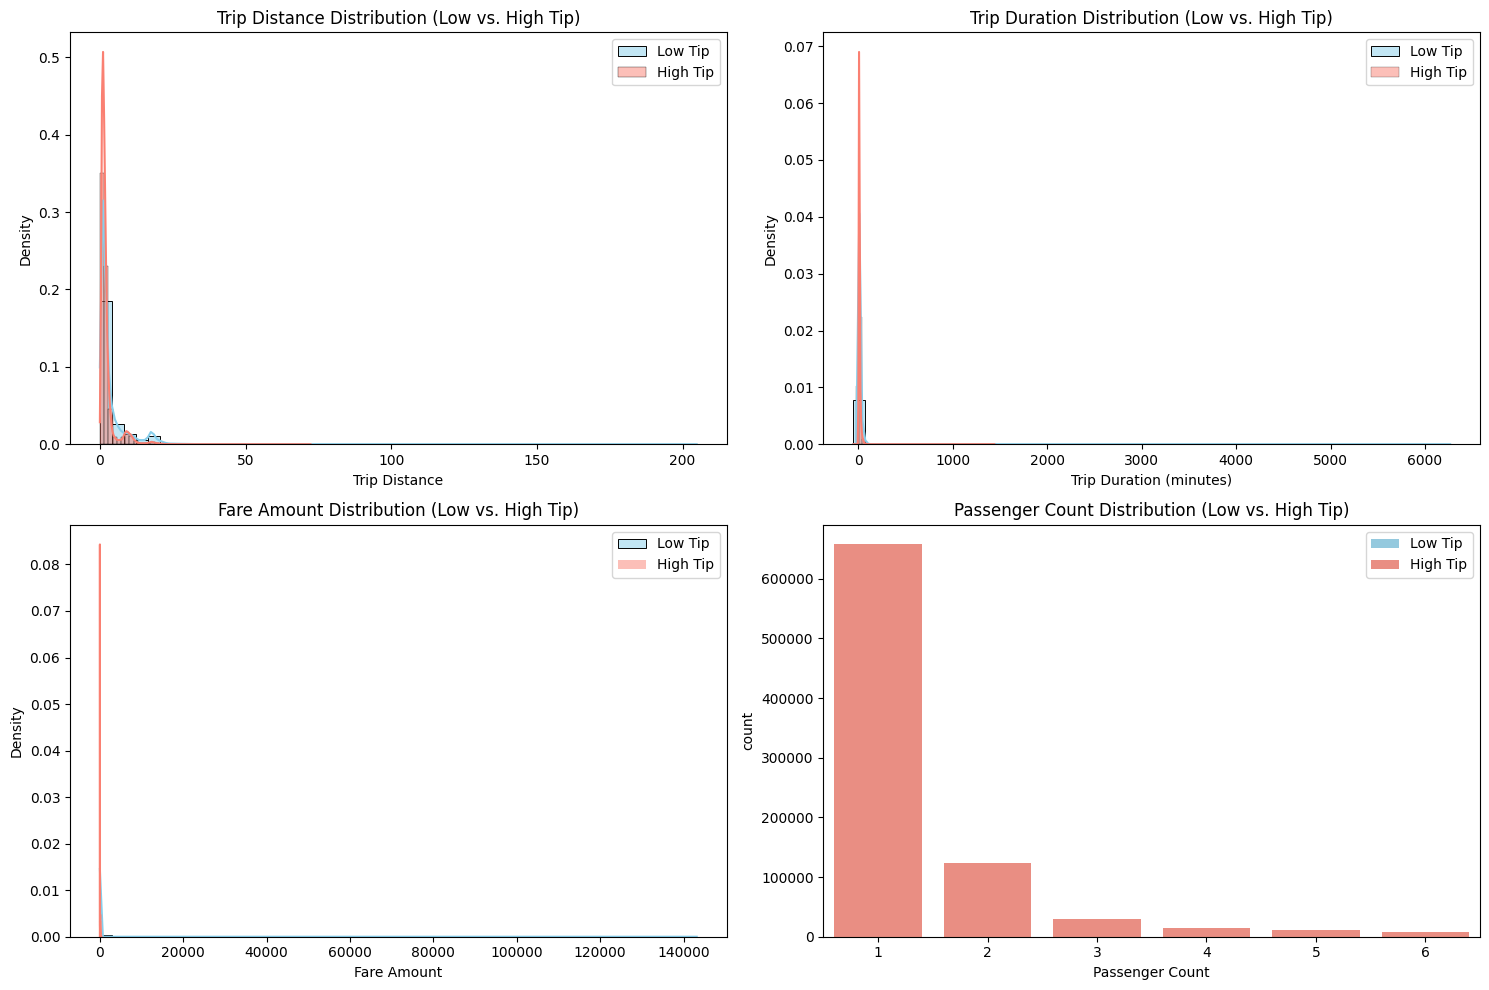

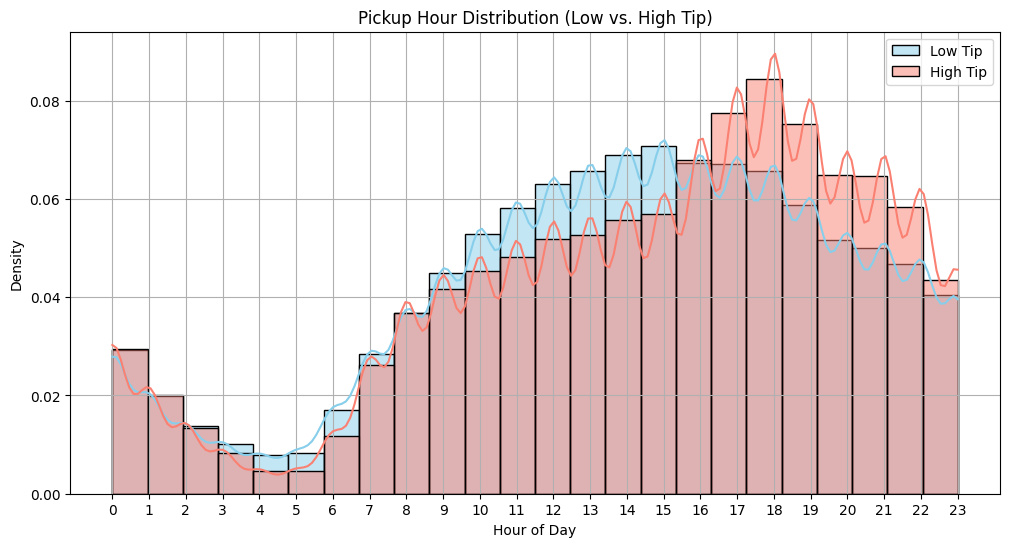

In [73]:
# Compare trips with tip percentage < 10% to trips with tip percentage > 25%


# Define low and high tip percentage thresholds
low_tip_threshold = 10
high_tip_threshold = 25

# Create dataframes for low and high tip trips
low_tip_df = df_financial[df_financial['tip_percentage'] < low_tip_threshold].copy()
high_tip_df = df_financial[df_financial['tip_percentage'] > high_tip_threshold].copy()

print(f"Number of trips with tip percentage < {low_tip_threshold}%: {len(low_tip_df)}")
print(f"Number of trips with tip percentage > {high_tip_threshold}%: {len(high_tip_df)}")

# Compare descriptive statistics for key columns between the two groups
comparison_columns = ['trip_distance', 'trip_duration', 'fare_amount', 'passenger_count', 'pickup_hour']

print("\nDescriptive Statistics Comparison (Low Tip vs. High Tip):")
print("\nLow Tip Trips:")
display(low_tip_df[comparison_columns].describe())

print("\nHigh Tip Trips:")
display(high_tip_df[comparison_columns].describe())

# Compare the distribution of categorical columns (e.g., payment_type, pickup_day_of_week)
print("\nPayment Type Distribution Comparison (Low Tip vs. High Tip):")
print("Low Tip Trips:")
display(low_tip_df['payment_type'].value_counts(normalize=True))
print("\nHigh Tip Trips:")
display(high_tip_df['payment_type'].value_counts(normalize=True))

print("\nPickup Day of Week Distribution Comparison (Low Tip vs. High Tip):")
print("Low Tip Trips:")
display(low_tip_df['pickup_day_of_week'].value_counts(normalize=True).sort_index())
print("\nHigh Tip Trips:")
display(high_tip_df['pickup_day_of_week'].value_counts(normalize=True).sort_index())

# Visualize distributions for key numerical columns
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
sns.histplot(low_tip_df['trip_distance'], bins=50, color='skyblue', label='Low Tip', kde=True, stat='density', common_norm=False)
sns.histplot(high_tip_df['trip_distance'], bins=50, color='salmon', label='High Tip', kde=True, stat='density', common_norm=False)
plt.title('Trip Distance Distribution (Low vs. High Tip)')
plt.xlabel('Trip Distance')
plt.legend()

plt.subplot(2, 2, 2)
sns.histplot(low_tip_df['trip_duration'], bins=50, color='skyblue', label='Low Tip', kde=True, stat='density', common_norm=False)
sns.histplot(high_tip_df['trip_duration'], bins=50, color='salmon', label='High Tip', kde=True, stat='density', common_norm=False)
plt.title('Trip Duration Distribution (Low vs. High Tip)')
plt.xlabel('Trip Duration (minutes)')
plt.legend()

plt.subplot(2, 2, 3)
sns.histplot(low_tip_df['fare_amount'], bins=50, color='skyblue', label='Low Tip', kde=True, stat='density', common_norm=False)
sns.histplot(high_tip_df['fare_amount'], bins=50, color='salmon', label='High Tip', kde=True, stat='density', common_norm=False)
plt.title('Fare Amount Distribution (Low vs. High Tip)')
plt.xlabel('Fare Amount')
plt.legend()

plt.subplot(2, 2, 4)
sns.countplot(x='passenger_count', data=low_tip_df, color='skyblue', label='Low Tip')
sns.countplot(x='passenger_count', data=high_tip_df, color='salmon', label='High Tip')
plt.title('Passenger Count Distribution (Low vs. High Tip)')
plt.xlabel('Passenger Count')
plt.legend()

plt.tight_layout()
plt.show()

# Visualize hourly distribution
plt.figure(figsize=(12, 6))
sns.histplot(low_tip_df['pickup_hour'], bins=24, color='skyblue', label='Low Tip', kde=True, stat='density', common_norm=False)
sns.histplot(high_tip_df['pickup_hour'], bins=24, color='salmon', label='High Tip', kde=True, stat='density', common_norm=False)
plt.title('Pickup Hour Distribution (Low vs. High Tip)')
plt.xlabel('Hour of Day')
plt.xticks(range(0, 24))
plt.legend()
plt.grid(True)
plt.show()

**3.2.14** <font color = red>[3 marks]</font> <br>
Analyse the variation of passenger count across hours and days of the week.

Average Passenger Count by Hour of Day:


,passenger_count
pickup_hour,
0,1.432719
1,1.438161
2,1.455067
3,1.458290
4,1.404503
5,1.299029
6,1.260639
7,1.280263
8,1.299910


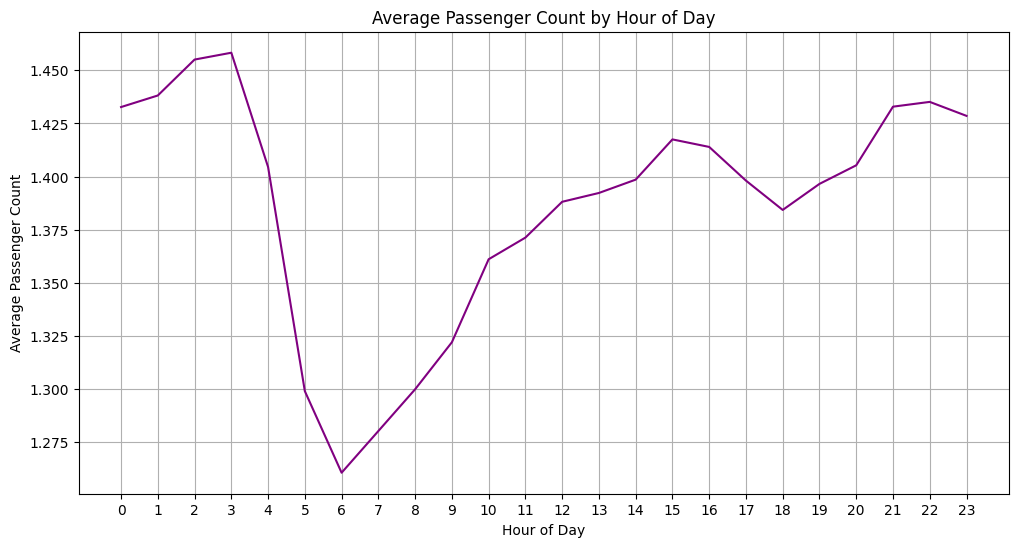


Average Passenger Count by Day of Week:


,passenger_count
Monday,1.366546
Tuesday,1.338335
Wednesday,1.335251
Thursday,1.347868
Friday,1.406456
Saturday,1.487549
Sunday,1.471635


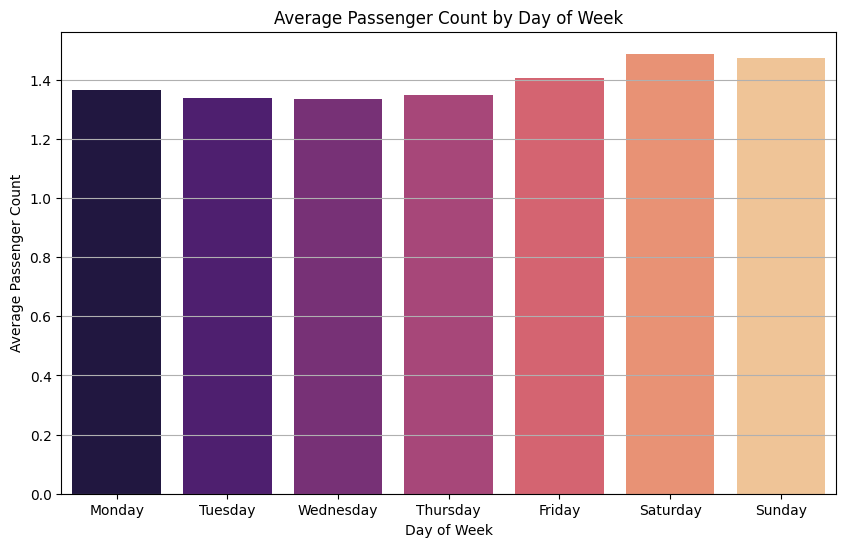

In [74]:
# See how passenger count varies across hours and days

# Analyze average passenger count by hour of day
print("Average Passenger Count by Hour of Day:")
average_passenger_count_hourly = df_financial.groupby('pickup_hour')['passenger_count'].mean()
display(average_passenger_count_hourly)

# Visualize average passenger count by hour
plt.figure(figsize=(12, 6))
average_passenger_count_hourly.plot(kind='line', color='purple')
plt.title('Average Passenger Count by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Average Passenger Count')
plt.xticks(range(0, 24))
plt.grid(True)
plt.show()

# Analyze average passenger count by day of week
print("\nAverage Passenger Count by Day of Week:")
average_passenger_count_daily = df_financial.groupby('pickup_day_of_week')['passenger_count'].mean()

# Map numerical day of the week to names for better display
day_names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
average_passenger_count_daily.index = day_names

display(average_passenger_count_daily)

# Visualize average passenger count by day of week
plt.figure(figsize=(10, 6))
sns.barplot(x=average_passenger_count_daily.index, y=average_passenger_count_daily.values, palette='magma')
plt.title('Average Passenger Count by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Average Passenger Count')
plt.grid(axis='y')
plt.show()

**3.2.15** <font color = red>[2 marks]</font> <br>
Analyse the variation of passenger counts across zones

In [75]:
# How does passenger count vary across zones

# Group by pickup location ID and calculate the average passenger count
average_passenger_count_by_zone = df_merged_pickup.groupby('PULocationID')['passenger_count'].mean().reset_index()
average_passenger_count_by_zone.columns = ['PULocationID', 'average_passenger_count']

print("Average Passenger Count by Pickup Zone:")
display(average_passenger_count_by_zone.head())

# Optional: Visualize the average passenger count by zone (e.g., using a bar plot for top/bottom zones or merging with geodata for a map)
# For simplicity, let's just show the zones with highest and lowest average passenger counts
print("\nZones with highest average passenger count:")
display(average_passenger_count_by_zone.sort_values(by='average_passenger_count', ascending=False).head(10))

print("\nZones with lowest average passenger count:")
display(average_passenger_count_by_zone.sort_values(by='average_passenger_count', ascending=True).head(10))

Average Passenger Count by Pickup Zone:


,PULocationID,average_passenger_count
0,1,1.626126
1,2,1.000000
2,3,1.024390
3,4,1.441361
4,5,1.000000



Zones with highest average passenger count:


,PULocationID,average_passenger_count
196,204,2.166667
104,111,2.000000
5,6,1.965517
187,195,1.808612
11,12,1.746776
56,58,1.666667
0,1,1.626126
64,66,1.594203
252,261,1.549421
43,45,1.540939



Zones with lowest average passenger count:


,PULocationID,average_passenger_count
22,23,1.0
30,32,1.0
29,31,1.0
26,27,1.0
42,44,1.0
44,46,1.0
55,57,1.0
49,51,1.0
103,109,1.0
108,115,1.0


In [76]:
# For a more detailed analysis, we can use the zones_with_trips GeoDataFrame
# Create a new column for the average passenger count in each zone.

zones_with_trips = zones_with_trips.merge(average_passenger_count_by_zone, on='PULocationID', how='left')


zones_with_trips['average_passenger_count'] = zones_with_trips['average_passenger_count'].fillna(0) # Filling with 0 for zones with no trips

print("Zones GeoDataFrame with average passenger count:")
display(zones_with_trips.head())

Zones GeoDataFrame with average passenger count:


,OBJECTID,Shape_Leng,Shape_Area,zone,PULocationID,borough,geometry,trip_count,average_passenger_count
0,1,0.116357,0.000782,Newark Airport,1,EWR,"POLYGON ((933100.918 192536.086, 933091.011 19...",222,1.626126
1,2,0.433470,0.004866,Jamaica Bay,2,Queens,"MULTIPOLYGON (((1033269.244 172126.008, 103343...",2,1.000000
2,3,0.084341,0.000314,Allerton/Pelham Gardens,3,Bronx,"POLYGON ((1026308.77 256767.698, 1026495.593 2...",41,1.024390
3,4,0.043567,0.000112,Alphabet City,4,Manhattan,"POLYGON ((992073.467 203714.076, 992068.667 20...",1910,1.441361
4,5,0.092146,0.000498,Arden Heights,5,Staten Island,"POLYGON ((935843.31 144283.336, 936046.565 144...",13,1.000000


Find out how often surcharges/extra charges are applied to understand their prevalance

**3.2.16** <font color = red>[5 marks]</font> <br>
Analyse the pickup/dropoff zones or times when extra charges are applied more frequently

In [77]:
# How often is each surcharge applied?

surcharge_columns = ['extra', 'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount', 'congestion_surcharge', 'airport_fee']

print("Prevalence of Surcharges (Number of trips with a value > 0):")
for col in surcharge_columns:
    count_with_surcharge = (df_financial[col] > 0).sum()
    print(f"- '{col}': {count_with_surcharge}")

# Analyze prevalence by pickup zone for a specific surcharge (e.g., congestion_surcharge)
print("\nTop 10 Pickup Zones by number of Congestion Surcharge applications:")
congestion_surcharge_by_zone = df_financial[df_financial['congestion_surcharge'] > 0]['PULocationID'].value_counts().head(10)
display(congestion_surcharge_by_zone)

# Analyze prevalence by pickup hour for a specific surcharge (e.g., congestion_surcharge)
print("\nNumber of Congestion Surcharge applications by Pickup Hour:")
congestion_surcharge_by_hour = df_financial[df_financial['congestion_surcharge'] > 0]['pickup_hour'].value_counts().sort_index()
display(congestion_surcharge_by_hour)

# Optional: You can extend this analysis to other surcharge types and also analyze by dropoff zone.

Prevalence of Surcharges (Number of trips with a value > 0):
- 'extra': 1161157
- 'mta_tax': 1874155
- 'tip_amount': 1469256
- 'tolls_amount': 154400
- 'improvement_surcharge': 1891096
- 'total_amount': 1891489
- 'congestion_surcharge': 1746327
- 'airport_fee': 167087

Top 10 Pickup Zones by number of Congestion Surcharge applications:


,count
PULocationID,
237,89467
161,87987
236,79459
162,67406
186,65044
142,62515
230,62286
170,55948
163,54919



Number of Congestion Surcharge applications by Pickup Hour:


,count
pickup_hour,
0,48182
1,32921
2,22021
3,14265
4,8635
5,8325
6,21314
7,45421
8,64685


## **4** Conclusion
<font color = red>[15 marks]</font> <br>

### **4.1** Final Insights and Recommendations
<font color = red>[15 marks]</font> <br>

Conclude your analyses here. Include all the outcomes you found based on the analysis.

Based on the insights, frame a concluding story explaining suitable parameters such as location, time of the day, day of the week etc. to be kept in mind while devising a strategy to meet customer demand and optimise supply.

**4.1.1** <font color = red>[5 marks]</font> <br>
Recommendations to optimize routing and dispatching based on demand patterns and operational inefficiencies

In [78]:
# Recommendations to optimize routing and dispatching

print("Routing and Dispatching Optimization Recommendations:\n")

print("1. Dynamic Fleet Allocation:")
print("   Concentrate taxis in high-demand zones (e.g., Midtown, JFK, East Village) during peak hours like rush hour and late-night weekends.\n")

print("2. Predictive Dispatching:")
print("   Use historical trip data to forecast demand and proactively position vehicles before surges occur.\n")

print("3. Traffic-Aware Routing:")
print("   Integrate real-time traffic data to guide drivers through faster, less congested routes.\n")

print("4. Zone-Specific Strategies:")
print("   Increase fleet presence in pickup-heavy zones and create rotation plans for drop-off-only zones to reduce deadheading.\n")

print("5. Nighttime Prioritization:")
print("   Focus dispatching between 11 PM–5 AM on areas with known late-night traffic such as nightlife hubs.\n")

print("6. Adaptive Rebalancing:")
print("   Reassess vehicle positions every 15–30 minutes based on live demand and trip completions for continuous optimization.")


Routing and Dispatching Optimization Recommendations:

1. Dynamic Fleet Allocation:
   Concentrate taxis in high-demand zones (e.g., Midtown, JFK, East Village) during peak hours like rush hour and late-night weekends.

2. Predictive Dispatching:
   Use historical trip data to forecast demand and proactively position vehicles before surges occur.

3. Traffic-Aware Routing:
   Integrate real-time traffic data to guide drivers through faster, less congested routes.

4. Zone-Specific Strategies:
   Increase fleet presence in pickup-heavy zones and create rotation plans for drop-off-only zones to reduce deadheading.

5. Nighttime Prioritization:
   Focus dispatching between 11 PM–5 AM on areas with known late-night traffic such as nightlife hubs.

6. Adaptive Rebalancing:
   Reassess vehicle positions every 15–30 minutes based on live demand and trip completions for continuous optimization.


**4.1.2** <font color = red>[5 marks]</font> <br>

Suggestions on strategically positioning cabs across different zones to make best use of insights uncovered by analysing trip trends across time, days and months.

In [ ]:
# Suggestions on strategically positioning cabs

print("Strategic Cab Positioning Recommendations:\n")

print("1. Time-of-Day Positioning:")
print("   - Morning (7–10 AM): Focus on residential-to-business corridors (e.g., Upper East Side to Midtown).")
print("   - Midday (11 AM–3 PM): Shift towards tourist and commercial areas (e.g., SoHo, Times Square).")
print("   - Evening Rush (4–8 PM): Position near office zones and entertainment areas (e.g., Chelsea, Financial District).")
print("   - Late Night (9 PM–2 AM): Increase presence in nightlife zones (e.g., East Village, Williamsburg).\n")

print("2. Day-of-Week Focus:")
print("   - Weekdays: Concentrate in business districts and transit hubs for commuter flow.")
print("   - Weekends: Emphasize parks, shopping areas, and event zones for leisure travel.\n")

print("3. Monthly Seasonality:")
print("   - Winter (Jan–Feb): Prioritize airport, transit hubs, and dense residential areas.")
print("   - Summer (May–Aug): Focus on parks, beaches, and festival zones like Central Park and Coney Island.")
print("   - Holiday Season (Nov–Dec): Deploy near shopping centers and tourist destinations.\n")

print("4. Airport & Inter-Borough Strategy:")
print("   - Keep fleet ready for high flight arrival windows at JFK and LGA.")
print("   - Create rerouting logic for trips ending in low-demand boroughs to rebalance fleet.\n")

print("5. Adaptive Zone Monitoring:")
print("   - Use heatmaps and zone scoring to dynamically reassign idle cabs to areas with forecasted demand.")
print("   - Refresh positioning every 30 minutes to align with live ride trends.")


Strategic Cab Positioning Recommendations:

1. Time-of-Day Positioning:
   - Morning (7–10 AM): Focus on residential-to-business corridors (e.g., Upper East Side to Midtown).
   - Midday (11 AM–3 PM): Shift towards tourist and commercial areas (e.g., SoHo, Times Square).
   - Evening Rush (4–8 PM): Position near office zones and entertainment areas (e.g., Chelsea, Financial District).
   - Late Night (9 PM–2 AM): Increase presence in nightlife zones (e.g., East Village, Williamsburg).

2. Day-of-Week Focus:
   - Weekdays: Concentrate in business districts and transit hubs for commuter flow.
   - Weekends: Emphasize parks, shopping areas, and event zones for leisure travel.

3. Monthly Seasonality:
   - Winter (Jan–Feb): Prioritize airport, transit hubs, and dense residential areas.
   - Summer (May–Aug): Focus on parks, beaches, and festival zones like Central Park and Coney Island.
   - Holiday Season (Nov–Dec): Deploy near shopping centers and tourist destinations.

4. Airport & Inte

**4.1.3** <font color = red>[5 marks]</font> <br>
Propose data-driven adjustments to the pricing strategy to maximize revenue while maintaining competitive rates with other vendors.

In [ ]:
# Propose data-driven adjustments to the pricing strategy

print("Data-Driven Pricing Strategy Recommendations:\n")

print("1. Time-Based Surge Pricing:")
print("   - Introduce dynamic pricing during high-demand windows (e.g., weekday rush hours, weekend nights).")
print("   - Use historical trip volume data to identify optimal periods for rate adjustments without reducing ride volume.\n")

print("2. Distance and Duration-Based Tiering:")
print("   - Apply tiered base fare models: short-haul, mid-range, and long-distance trips.")
print("   - Include duration-based components to account for traffic delays and idle time.\n")

print("3. Zone-Based Pricing Adjustments:")
print("   - Implement higher base fares for airport pickups and drop-offs, or high-demand zones like Midtown.")
print("   - Offer zone discounts to encourage ridership in low-demand or underutilized neighborhoods.\n")

print("4. Loyalty and Digital Payment Incentives:")
print("   - Provide fare discounts or cashback for repeat riders or app-based payments to increase retention.")
print("   - Introduce tiered benefits (e.g., 10th ride free) to foster customer loyalty.\n")

print("5. Competitor Benchmarking:")
print("   - Regularly analyze pricing trends of competitors (e.g., Uber, Lyft) in overlapping zones.")
print("   - Adjust fare multipliers to remain competitive while maintaining margins.\n")

print("6. Tip-Boosting Fare Structuring:")
print("   - Show suggested tip percentages (e.g., 15%, 20%) at checkout for card payments.")
print("   - Allow pre-selection of tip to simplify payment and encourage higher tipping behavior.\n")

print("7. Seasonal Promotional Pricing:")
print("   - Launch fare promotions during off-peak months (e.g., January, February) to stimulate ridership.")
print("   - Pair seasonal events (e.g., holidays, parades) with limited-time flat fares or discounts.")


Data-Driven Pricing Strategy Recommendations:

1. Time-Based Surge Pricing:
   - Introduce dynamic pricing during high-demand windows (e.g., weekday rush hours, weekend nights).
   - Use historical trip volume data to identify optimal periods for rate adjustments without reducing ride volume.

2. Distance and Duration-Based Tiering:
   - Apply tiered base fare models: short-haul, mid-range, and long-distance trips.
   - Include duration-based components to account for traffic delays and idle time.

3. Zone-Based Pricing Adjustments:
   - Implement higher base fares for airport pickups and drop-offs, or high-demand zones like Midtown.
   - Offer zone discounts to encourage ridership in low-demand or underutilized neighborhoods.

4. Loyalty and Digital Payment Incentives:
   - Provide fare discounts or cashback for repeat riders or app-based payments to increase retention.
   - Introduce tiered benefits (e.g., 10th ride free) to foster customer loyalty.

5. Competitor Benchmarking:
   - 

In [79]:
pip install PyMuPDF

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.1/24.1 MB 24.3 MB/s eta 0:00:00


In [80]:
# Read the PDF file and display its content
import fitz

def read_pdf(file_path):
    """Reads the content of a PDF file."""
    text = ""
    try:
        with fitz.open(file_path) as doc:
            for page in doc:
                text += page.get_text()
    except Exception as e:
        text = f"Error reading PDF: {e}"
    return text

pdf_path = "/content/drive/MyDrive/Taxi Project/Report_NYC_Taxi_Operations_Starter.docx"
pdf_content = read_pdf(pdf_path)
print(pdf_content)

Error reading PDF: Cannot open empty file: filename='/content/drive/MyDrive/Taxi Project/Report_NYC_Taxi_Operations_Starter.docx'.


In [81]:
# Store the df in parquet format
df.to_csv('/content/drive/MyDrive/Taxi Project/Taxi_final.csv')